# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating df
import pandas as pd
import numpy as np

# Libaries to help with df visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# To tune model, get different metric scores, and split df
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for df scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample df
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dfframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dfframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier
import xgboost as xgb

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/machine_learning/BankChurners.csv')
df = data.copy() # working from a copy of the dataset

##Custom Functions

In [ ]:
'''
Function that formats a print function to recognize
numbers and display them in bold, with blue font.
The function can convert numbers into dollars with the
'in_thousands' argument and can also convert numbers
to a percentage with two decimal places if 'pct' is True.
'''
def fmt(*args, decimals=4, in_thousands=False, pct=False):
    for i, arg in enumerate(args):
        next_arg = args[i + 1] if i + 1 < len(args) else None

        if isinstance(arg, (int, float, np.number)):
            # Convert to percentage if pct is True and set decimal places to 2
            if pct:
                arg = arg * 100  # Convert to percentage
                formatted_arg = f'{arg:.2f}%'  # Format with 2 decimal places for percentage
            else:
                # If in_thousands is True, convert the number to thousands and format as an integer
                if in_thousands:
                    arg = int(arg * 1000)  # Convert to thousands and ensure it's an integer

                # Format as a comma-separated string if it's an integer type
                if isinstance(arg, (int, np.integer)):
                    formatted_arg = f'{arg:,}'  # For integer types
                    if in_thousands:
                        formatted_arg = f'${formatted_arg}'  # Add the dollar sign if in_thousands is True
                else:  # For floating-point types
                    formatted_arg = f'{arg:.{decimals}f}'  # Regular floating-point format
                    if in_thousands:
                        formatted_arg = f'${formatted_arg}'  # Add the dollar sign if in_thousands is True

            print(f'\033[1m\033[94m{formatted_arg}\033[0m', end='' if isinstance(next_arg, str) else ' ')
        else:
            print(arg, end='' if isinstance(next_arg, (int, float, np.number)) else ' ')

    print()

In [ ]:
'''
Function to print the min/max, median, etc.
values for variables
'''
def spilltea(feature):
  teaMax = df[feature].max()
  teaMin = df[feature].min()
  teaAvg = df[feature].mean()
  teaMod = df[feature].mode()[0]
  fmt('The maximum value is: ', teaMax)
  fmt('The minimum value is: ', teaMin)
  fmt('The average value is: ', teaAvg)
  fmt('The most common value is: ', teaMod)

## Data Overview

In [ ]:
# check shape of the data
fmt('There are ', df.shape[0], ' rows and ', df.shape[1], ' columns')

There are 10,127 rows and 21 columns 


In [ ]:
# first three rows of dataset
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000


In [ ]:
# last three rows of dataset
df.tail(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
# check for duplicate rows
df.duplicated(subset='CLIENTNUM', keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

There are no duplicated rows.

In [ ]:
# Get basic info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# describe continuous data columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [ ]:
# describe the object data types
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


* Ordinal column / df types:
  * Education Level
  * Income Category
  * Card Category

In [ ]:
# drop the CLIENTNUM column; it's not needed
df.drop('CLIENTNUM', inplace=True, axis=1)

In [ ]:
# get counts and unique values for each column
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [ ]:
# check for missing values
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

There are missing values in the 'Education_Level' and 'Marital_Status' columns.

<a href='#link1'>Go to EDA Section</a>

## Data Pre-processing

###Outliers

In [ ]:
Q1 = df.quantile(0.25)  # To find the 25th percentile
Q3 = df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

Outlier detection is incorrectly flagging the '1' class of Attrition_Flag as outliers

In [ ]:
# replace the erroneous values with nan
df["Income_Category"].replace("abc", np.nan, inplace=True)

#####Split the Data

In [ ]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [ ]:
# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (1519, 19) (507, 19)


In [ ]:
from sklearn.impute import SimpleImputer

# Assume X_train, X_val, and X_test are predefined split dataframes from the main dataframe

# Define the columns that you want to impute
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# Create an instance of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

# Fit the imputer on the training data
imputer.fit(X_train[reqd_col_for_impute])

# Transform the training data using the fitted imputer
X_train[reqd_col_for_impute] = imputer.transform(X_train[reqd_col_for_impute])

# Transform the validation and test data using the same fitted imputer
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])


In [ ]:
# Checking that no column has missing values in train, val, and test sets
fmt(X_train.isna().any().any())
print("-" * 30)
fmt(X_val.isna().any().any())
print("-" * 30)
fmt(X_test.isna().any().any())

False 
------------------------------
False 
------------------------------
False 


In [ ]:
# convert object data types to category for train dataset
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

# convert object data types to category for val dataset
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

# convert object data types to category for test dataset
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    4286
M    3815
Name: Gender, dtype: int64
******************************
Graduate         3707
High School      1619
Uneducated       1202
College           808
Post-Graduate     410
Doctorate         355
Name: Education_Level, dtype: int64
******************************
Married     4349
Single      3141
Divorced     611
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3764
$40K - $60K       1372
$80K - $120K      1226
$60K - $80K       1159
$120K +            580
Name: Income_Category, dtype: int64
******************************
Blue        7551
Silver       435
Gold          98
Platinum      17
Name: Card_Category, dtype: int64
******************************
F    826
M    693
Name: Gender, dtype: int64
******************************
Graduate         719
High School      288
Uneducated       213
College          153
Post-Graduate     76
Doctorate         70
Name: Education_Level, dtype: int64
******************************
Married     813
Single

#####Encoding Categorical Variables

In [ ]:
# One-hot encode the training data
X_train = pd.get_dummies(X_train, drop_first=True)

# Apply the same one-hot encoding to validation and test data
# This assumes X_val and X_test initially have the same features as X_train before encoding
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the validation and test set with the training set
# This ensures all three sets have the same columns after encoding
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now the shapes of the dataframes should be aligned and they are ready for use in training and evaluating a model
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (1519, 29) (507, 29)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dfframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    '''
    To plot the confusion_matrix with percentages and labels.

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    # Create an array with the labels.
    labels_with_percent = np.asarray(
        [
            [
                f"{item}\n{item/cm.flatten().sum():.2%}\n{label}"
                for item, label in zip(row, labels_row)
            ]
            for row, labels_row in zip(cm, [["TN", "FP"], ["FN", "TP"]])
        ]
    )

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels_with_percent, fmt="", cmap='Blues')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance (Recall):" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance (Recall):" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance (Recall):

Bagging: 0.9846390168970814
Random forest: 1.0
AdaBoost: 0.8609831029185868
Gradient Boosting: 0.8863287250384024
XGBoost: 1.0

Validation Performance (Recall):

Bagging: 0.7786885245901639
Random forest: 0.7991803278688525
AdaBoost: 0.8524590163934426
Gradient Boosting: 0.8401639344262295
XGBoost: 0.9057377049180327


### Model Building with Oversampled Data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.998529195469922
Random forest: 1.0
AdaBoost: 0.9704368289454331
Gradient Boosting: 0.9804382997499632
XGBoost: 1.0

Validation Performance:

Bagging: 0.8319672131147541
Random forest: 0.8278688524590164
AdaBoost: 0.8483606557377049
Gradient Boosting: 0.8688524590163934
XGBoost: 0.9057377049180327


### Model Building with Undersampled Data

In [ ]:
# Random undersampler for under sampling the df
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9930875576036866
Random forest: 1.0
AdaBoost: 0.9600614439324117
Gradient Boosting: 0.9792626728110599
XGBoost: 1.0

Validation Performance:

Bagging: 0.9016393442622951
Random forest: 0.9549180327868853
AdaBoost: 0.9385245901639344
Gradient Boosting: 0.9385245901639344
XGBoost: 0.9836065573770492


### HyperparameterTuning

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##Bagging

###Tuning Bagging model with Original Data

In [ ]:
%%time

# Defining the model
Model = BaggingClassifier(random_state=1)

# Parameter grid
param_grid = {
    'max_samples': [0.8, 0.9, 1.0],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 1.0, 'max_features': 0.9} with CV score=0.8532743884468023:
CPU times: user 6.75 s, sys: 575 ms, total: 7.33 s
Wall time: 3min 28s


In [ ]:
# Tuned Bagging model
tuned_bagg = BaggingClassifier(
    random_state=1,
    max_samples=1.0,
    max_features=0.9,
    n_estimators=70,
    )

tuned_bagg.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, n_estimators=70, random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned Bagging classifier on the training data
bagg_train_performance = model_performance_classification_sklearn(tuned_bagg, X_train, y_train)

# Display the performance metrics
print(bagg_train_performance)

   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned Bagging classifier on the training data
bagg_val_performance = model_performance_classification_sklearn(tuned_bagg, X_val, y_val)

# Display the performance metrics
print(bagg_val_performance)

   Accuracy  Recall  Precision    F1
0     0.962   0.832      0.923 0.875


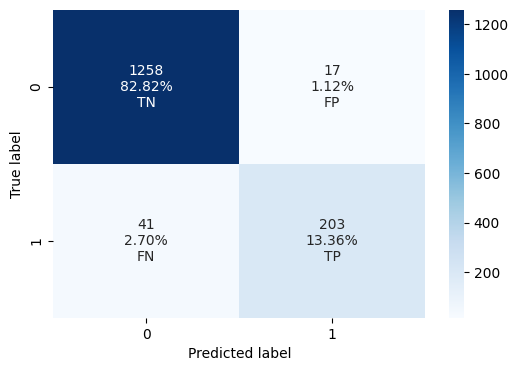

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_bagg, X_val, y_val)

###Tuning Bagging model with Undersampled Data

In [ ]:
# tuning with undersampled data
# Tuned Bagging model
tuned_bagg2 = BaggingClassifier(
    random_state=1,
    max_samples=1.0,
    max_features=0.9,
    n_estimators=70,
    )

tuned_bagg2.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, n_estimators=70, random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned Bagging classifier on the training data
bagg2_train_performance = model_performance_classification_sklearn(tuned_bagg2, X_train_un, y_train_un)

# Display the performance metrics
print(bagg2_train_performance)

   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned Bagging classifier on the training data
bagg2_val_performance = model_performance_classification_sklearn(tuned_bagg2, X_val, y_val)

# Display the performance metrics
print(bagg2_val_performance)

   Accuracy  Recall  Precision    F1
0     0.938   0.922      0.750 0.827


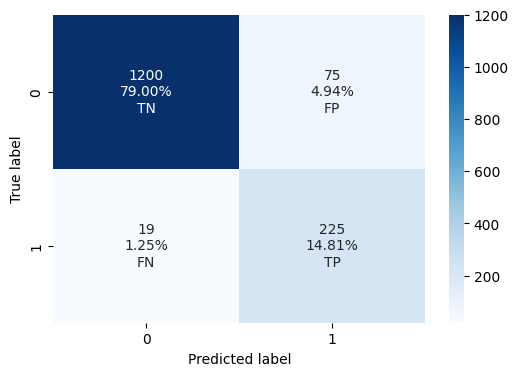

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_bagg2, X_val, y_val)

###Tuning Bagging model with Oversampled Data

In [ ]:
# Tuned Bagging model
tuned_bagg3 = BaggingClassifier(
    random_state=1,
    max_samples=1.0,
    max_features=0.9,
    n_estimators=70,
    )

tuned_bagg3.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.9, n_estimators=70, random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned Bagging classifier on the training data
bagg3_train_performance = model_performance_classification_sklearn(tuned_bagg3, X_train_over, y_train_over)

# Display the performance metrics
print(bagg3_train_performance)

   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


####Validation performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned Bagging classifier on the training data
bagg3_val_performance = model_performance_classification_sklearn(tuned_bagg3, X_val, y_val)

# Display the performance metrics
print(bagg3_val_performance)

   Accuracy  Recall  Precision    F1
0     0.955   0.865      0.858 0.861


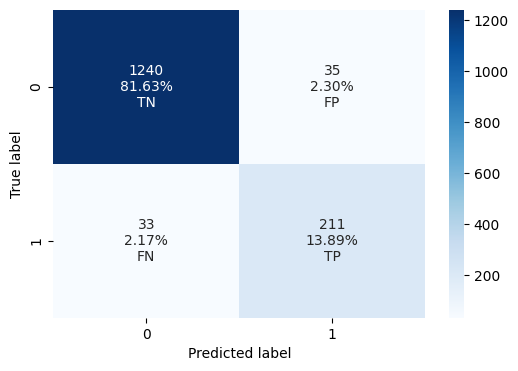

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_bagg3, X_val, y_val)

##Random Forest

###Tuning Random Forest with Original Data

In [ ]:
%%time

#defining the model
Model = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7764868847627467:
CPU times: user 2.53 s, sys: 232 ms, total: 2.76 s
Wall time: 52.7 s


In [ ]:
# Tuned RandomForest model
tuned_rand = RandomForestClassifier(
    random_state=1,
    min_samples_leaf=2,
    max_samples=0.6,
    max_features='sqrt',
    n_estimators=110,
    )

tuned_rand.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, min_samples_leaf=2, n_estimators=110,
                       random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
rand_train_performance = model_performance_classification_sklearn(tuned_rand, X_train, y_train)

# Display the performance metrics
print(rand_train_performance)

   Accuracy  Recall  Precision    F1
0     0.988   0.932      0.989 0.960


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
rand_val_performance = model_performance_classification_sklearn(tuned_rand, X_val, y_val)

# Display the performance metrics
print(rand_val_performance)

   Accuracy  Recall  Precision    F1
0     0.953   0.754      0.939 0.836


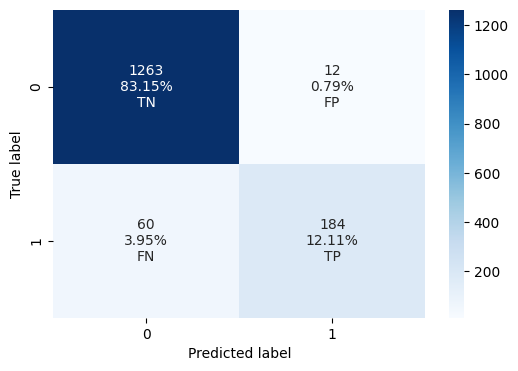

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_rand, X_val, y_val)

###Tuning Random Forest with Undersampled Data

In [ ]:
# tuning with undersampled data
tuned_rand2 = RandomForestClassifier(
    random_state=1,
    min_samples_leaf=2,
    max_samples=0.6,
    max_features='sqrt',
    n_estimators=110,
    )

tuned_rand2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, min_samples_leaf=2, n_estimators=110,
                       random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
rand2_train_performance = model_performance_classification_sklearn(tuned_rand2, X_train_un, y_train_un)

# Display the performance metrics
print(rand2_train_performance)

   Accuracy  Recall  Precision    F1
0     0.987   0.993      0.980 0.987


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
rand2_val_performance = model_performance_classification_sklearn(tuned_rand2, X_val, y_val)

# Display the performance metrics
print(rand2_val_performance)

   Accuracy  Recall  Precision    F1
0     0.947   0.947      0.775 0.852


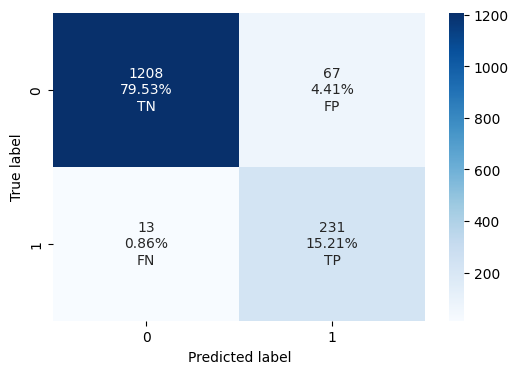

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_rand2, X_val, y_val)

###Tuning Random Forest with Oversampled Data

In [ ]:
# tuning with Overersampled data
tuned_rand3 = RandomForestClassifier(
    random_state=1,
    min_samples_leaf=2,
    max_samples=0.6,
    max_features='sqrt',
    n_estimators=110,
    )
tuned_rand3.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, min_samples_leaf=2, n_estimators=110,
                       random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
rand3_train_performance = model_performance_classification_sklearn(tuned_rand3, X_train_over, y_train_over)

# Display the performance metrics
print(rand3_train_performance)

   Accuracy  Recall  Precision    F1
0     0.995   0.998      0.992 0.995


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
rand3_val_performance = model_performance_classification_sklearn(tuned_rand3, X_val, y_val)

# Display the performance metrics
print(rand3_val_performance)

   Accuracy  Recall  Precision    F1
0     0.961   0.844      0.904 0.873


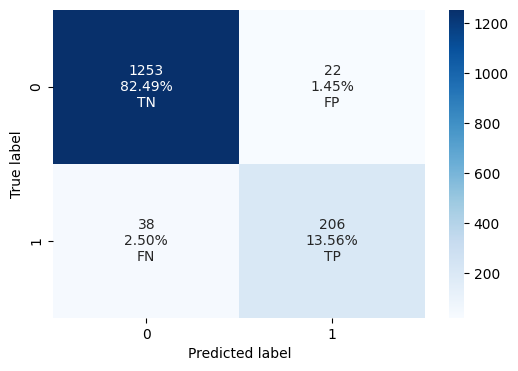

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_rand3, X_val, y_val)

##XG Boost

###Tuning XGBoost with original Data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9370232832301799:
CPU times: user 2.73 s, sys: 307 ms, total: 3.04 s
Wall time: 1min 21s


In [ ]:
# Tuned XGBoost model
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=1,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
xgb_train_performance = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)

# Display the performance metrics
print(xgb_train_performance)

   Accuracy  Recall  Precision    F1
0     0.991   1.000      0.948 0.973


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned RandomForest classifier on the training data
xgb_val_performance = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)

# Display the performance metrics
print(xgb_val_performance)

   Accuracy  Recall  Precision    F1
0     0.970   0.934      0.887 0.910


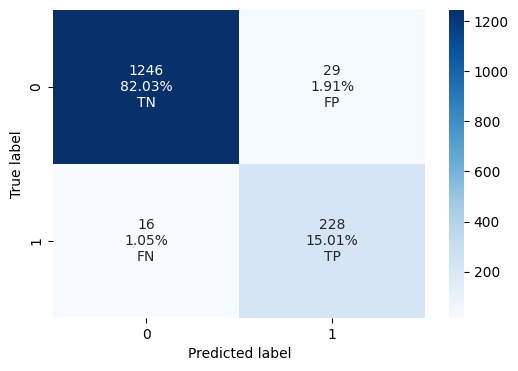

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_xgb, X_val, y_val)

###Tuning XGBoost with Undersampled Data

In [ ]:
# tuning with undersampled data
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=1,
)

tuned_xgb2.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned XGBoost classifier on the training data
xgb2_train_performance = model_performance_classification_sklearn(tuned_xgb2, X_train_un, y_train_un)

# Display the performance metrics
print(xgb2_train_performance)

   Accuracy  Recall  Precision    F1
0     0.994   1.000      0.989 0.994


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned XGBbost classifier on the training data
xgb2_val_performance = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)

# Display the performance metrics
print(xgb2_val_performance)

   Accuracy  Recall  Precision    F1
0     0.927   0.980      0.693 0.812


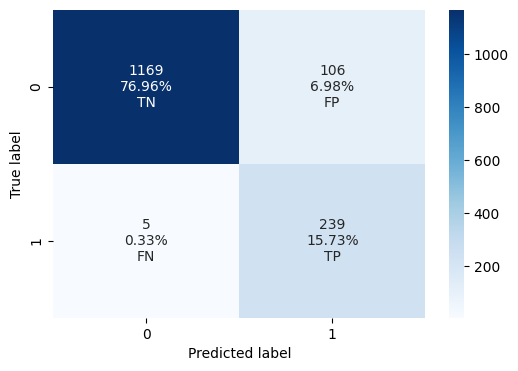

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_xgb2, X_val, y_val)

###Tuning XGBoost with Oversampled Data

In [ ]:
# tuning with undersampled data
tuned_xgb3 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=1,
)

tuned_xgb3.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned XGBoost classifier on the training data
xgb3_train_performance = model_performance_classification_sklearn(tuned_xgb3, X_train_over, y_train_over)

# Display the performance metrics
print(xgb3_train_performance)

   Accuracy  Recall  Precision    F1
0     0.992   1.000      0.984 0.992


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned XGBoost classifier on the training data
xgb3_val_performance = model_performance_classification_sklearn(tuned_xgb3, X_val, y_val)

# Display the performance metrics
print(xgb3_val_performance)

   Accuracy  Recall  Precision    F1
0     0.964   0.939      0.854 0.895


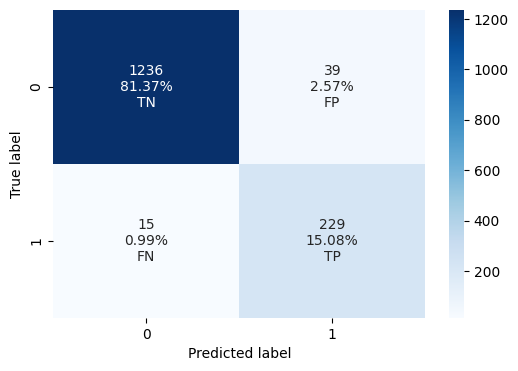

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_xgb3, X_val, y_val)

##Gradient Boost

###Tuning Gradient Boosting with Original Data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8317830828175655:
CPU times: user 5.59 s, sys: 703 ms, total: 6.29 s
Wall time: 3min 42s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned GradientBoost classifier on the training data
gbm_train_performance = model_performance_classification_sklearn(tuned_gbm, X_train, y_train)

# Display the performance metrics
print(gbm_train_performance)

   Accuracy  Recall  Precision    F1
0     0.974   0.880      0.955 0.916


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned GradientBoost classifier on the training data
gbm_val_performance = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)

# Display the performance metrics
print(gbm_val_performance)

   Accuracy  Recall  Precision    F1
0     0.968   0.840      0.953 0.893


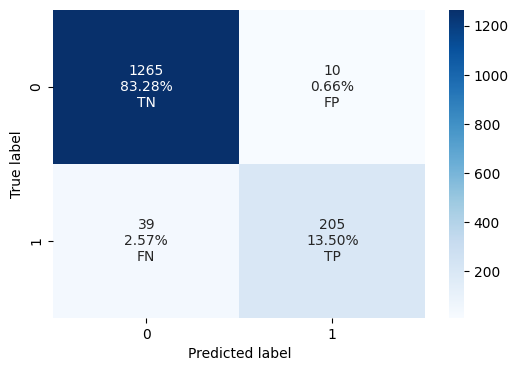

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_gbm, X_val, y_val)

###Tuning Gradient Boost with Undersampled Data

In [ ]:
# Fitting model to undersampled data set
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)
tuned_gbm2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned gradient boost classifier on the training data
gbm2_train_performance = model_performance_classification_sklearn(tuned_gbm2, X_train_un, y_train_un)

# Display the performance metrics
print(gbm2_train_performance)

   Accuracy  Recall  Precision    F1
0     0.977   0.979      0.974 0.977


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned gradient boost classifier on the validation data
gbm2_val_performance = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)

# Display the performance metrics
print(gbm2_val_performance)

   Accuracy  Recall  Precision    F1
0     0.949   0.951      0.779 0.856


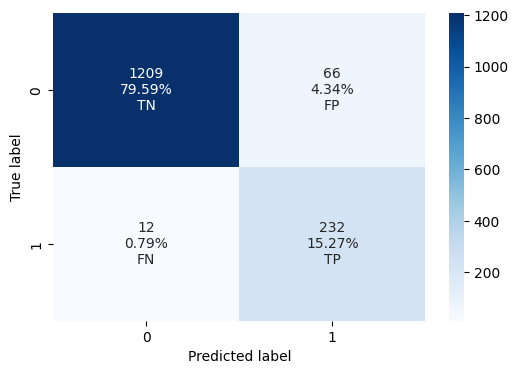

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_gbm2, X_val, y_val)

###Tuning Using Oversampled Data

In [ ]:
# Fitting model to oversampled data set
tuned_gbm3 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)
tuned_gbm3.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned gradient boost classifier on the training data
gbm3_train_performance = model_performance_classification_sklearn(tuned_gbm3, X_train_over, y_train_over)

# Display the performance metrics
print(gbm3_train_performance)

   Accuracy  Recall  Precision    F1
0     0.979   0.984      0.974 0.979


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned gradient boost classifier on the training data
gbm3_val_performance = model_performance_classification_sklearn(tuned_gbm3, X_val, y_val)

# Display the performance metrics
print(gbm3_val_performance)

   Accuracy  Recall  Precision    F1
0     0.955   0.865      0.854 0.859


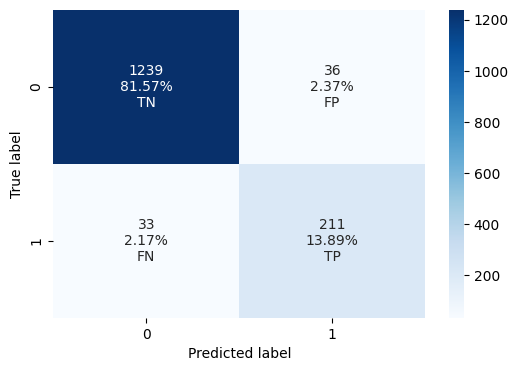

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_gbm3, X_val, y_val)

##AdaBoost

###Tuning AdaBoost with original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8732714412024757:
CPU times: user 5.27 s, sys: 384 ms, total: 5.65 s
Wall time: 2min 16s


In [ ]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned AdaBoost classifier on the training data
ada_train_performance = model_performance_classification_sklearn(tuned_ada, X_train, y_train)

# Display the performance metrics
print(ada_train_performance)

   Accuracy  Recall  Precision    F1
0     0.983   0.932      0.962 0.947


####Validation Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned AdaBoost classifier on the training data
ada_val_performance = model_performance_classification_sklearn(tuned_ada, X_val, y_val)

# Display the performance metrics
print(ada_val_performance)

   Accuracy  Recall  Precision    F1
0     0.972   0.865      0.955 0.908


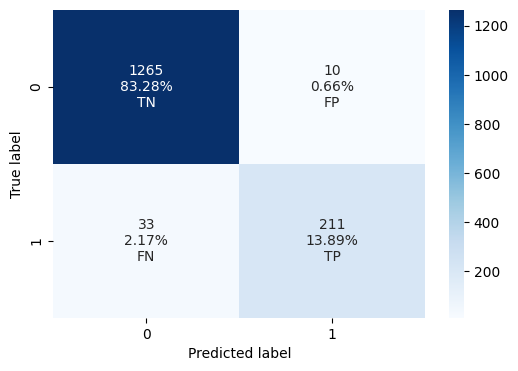

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_ada, X_val, y_val)

###Tuning AdaBoost with Undersampled Data

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

####Train Performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned AdaBoost classifier on the training data
ada2_train_performance = model_performance_classification_sklearn(tuned_ada2, X_train_un, y_train_un)

# Display the performance metrics
print(ada2_train_performance)


   Accuracy  Recall  Precision    F1
0     0.986   0.988      0.983 0.986


####Validation Performance

In [ ]:
# Checking model's performance on validation set
ada2_val_performance = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)

# Display the performance metrics
print(ada2_val_performance)

   Accuracy  Recall  Precision    F1
0     0.947   0.959      0.770 0.854


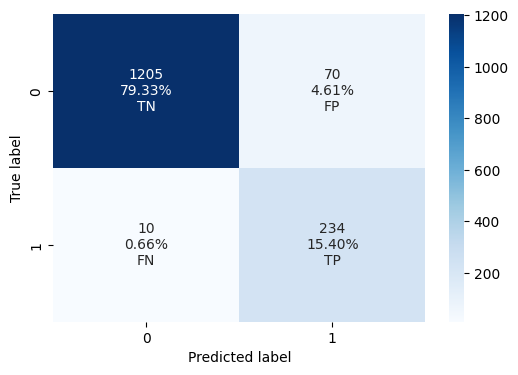

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_ada2, X_val, y_val)

###Tuning AdaBoost with Oversampled Data

In [ ]:
# Creating new pipeline with best parameters
tuned_ada3 = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

tuned_ada3.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

####Oversampled (Train) Set

In [ ]:
# Now let's use the provided function to get the performance of the tuned AdaBoost classifier on the Oversampled training data
ada3_train_performance = model_performance_classification_sklearn(tuned_ada3, X_train_over, y_train_over)

# Display the performance metrics
print(ada3_train_performance)

   Accuracy  Recall  Precision    F1
0     0.984   0.986      0.982 0.984


####Validation Set

In [ ]:
# Checking model's performance on validation set
ada3_val_performance = model_performance_classification_sklearn(tuned_ada3, X_val, y_val)

# Display the performance metrics
print(ada3_val_performance)

   Accuracy  Recall  Precision    F1
0     0.964   0.881      0.892 0.887


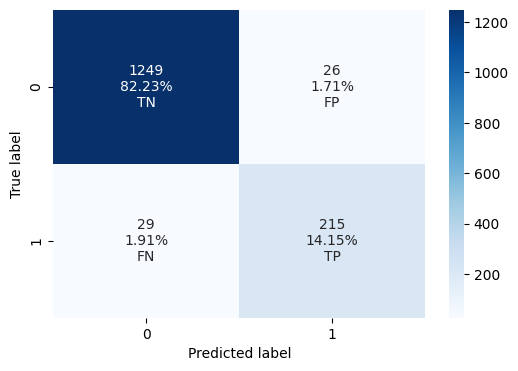

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_ada3, X_val, y_val)

## Model Comparison and Final Model Selection

In [ ]:
# Concatenate the performance DataFrames along axis=0 (top to bottom)
models_train_comp_df = pd.concat(
    [ada3_train_performance, ada2_train_performance, gbm3_train_performance, gbm2_train_performance, xgb3_train_performance, xgb2_train_performance,
     rand3_train_performance, rand2_train_performance, bagg3_train_performance, bagg2_train_performance],
    axis=0,
)

# Set the row names to the names of the models
models_train_comp_df.index = [
    'AdaBoost (Oversampled)',
    'AdaBoost (Undersampled)',
    'Gradient Boost (Oversampled)',
    'Gradient Boost (undersampled)',
    'XGBoost (Oversampled)',
    'XGBoost (Undersampled)',
    'Random Forest (Oversampled)',
    'Random Forest (Undersampled)',
    'Bagging (Oversampled)',
    'Bagging (Undersampled)'
]

print("Training performance comparison:")
display(models_train_comp_df)

print(" ")
# Concatenate the performance DataFrames along axis=0 (top to bottom)
models_train_comp_df = pd.concat(
    [ada3_val_performance, ada2_val_performance, gbm3_val_performance, gbm2_val_performance, xgb3_val_performance, xgb2_val_performance,
     rand3_val_performance, rand2_val_performance, bagg3_val_performance, bagg2_val_performance],
    axis=0,
)

# Set the row names to the names of the models
models_train_comp_df.index = [
    'AdaBoost (Oversampled)',
    'AdaBoost (Undersampled)',
    'Gradient Boost (Oversampled)',
    'Gradient Boost (undersampled)',
    'XGBoost (Oversampled)',
    'XGBoost (Undersampled)',
    'Random Forest (Oversampled)',
    'Random Forest (Undersampled)',
    'Bagging (Oversampled)',
    'Bagging (Undersampled)'
]

print("Validation performance comparison:")
display(models_train_comp_df)



Training performance comparison:


,Accuracy,Recall,Precision,F1
AdaBoost (Oversampled),0.984,0.986,0.982,0.984
AdaBoost (Undersampled),0.986,0.988,0.983,0.986
Gradient Boost (Oversampled),0.979,0.984,0.974,0.979
Gradient Boost (undersampled),0.977,0.979,0.974,0.977
XGBoost (Oversampled),0.992,1.000,0.984,0.992
XGBoost (Undersampled),0.994,1.000,0.989,0.994
Random Forest (Oversampled),0.995,0.998,0.992,0.995
Random Forest (Undersampled),0.987,0.993,0.980,0.987
Bagging (Oversampled),1.000,1.000,1.000,1.000
Bagging (Undersampled),1.000,1.000,1.000,1.000


 
Validation performance comparison:


,Accuracy,Recall,Precision,F1
AdaBoost (Oversampled),0.964,0.881,0.892,0.887
AdaBoost (Undersampled),0.947,0.959,0.770,0.854
Gradient Boost (Oversampled),0.955,0.865,0.854,0.859
Gradient Boost (undersampled),0.949,0.951,0.779,0.856
XGBoost (Oversampled),0.964,0.939,0.854,0.895
XGBoost (Undersampled),0.927,0.980,0.693,0.812
Random Forest (Oversampled),0.961,0.844,0.904,0.873
Random Forest (Undersampled),0.947,0.947,0.775,0.852
Bagging (Oversampled),0.955,0.865,0.858,0.861
Bagging (Undersampled),0.938,0.922,0.750,0.827


During final model selection, a high recall score (limiting 'false negatives') is the priority so that we do not miss/ignore customer accounts which are at-risk for attrition.

The model with the highest recall score is: **XGBoost (Undersampled) / 0.980**
However, this model also has the lowest precision score - which is important if the business is resource-conscious and wants to limit erroneous attention toward false positives.

In this case, Let's assume that the business would rather spend some extra time on customer accounts that were not actually at risk of churn in favor of more accurately identifying those that will.

**Decision**

We'll choose the **XGBoost (Undersampled)** model which may produce more false positives (but should maximize the business's ability to limit false negatives).

### Test set final performance

In [ ]:
# Now let's use the provided function to get the performance of the tuned gradient boost classifier on the training data
xgb_over_test_performance = model_performance_classification_sklearn(tuned_xgb2, X_test, y_test)

In [ ]:
# Concatenate the performance DataFrames along axis=0 (top to bottom)
models_train_comp_df = pd.concat(
    [xgb_over_test_performance],
    axis=0,)

# Set the row names to the names of the models
models_train_comp_df.index = [
    'XGBoost (Oversampled)']

print("TEST performance of XG Boost (Undersampled):")
display(models_train_comp_df)

TEST performance of XG Boost (Undersampled):


,Accuracy,Recall,Precision,F1
XGBoost (Oversampled),0.941,0.938,0.752,0.835


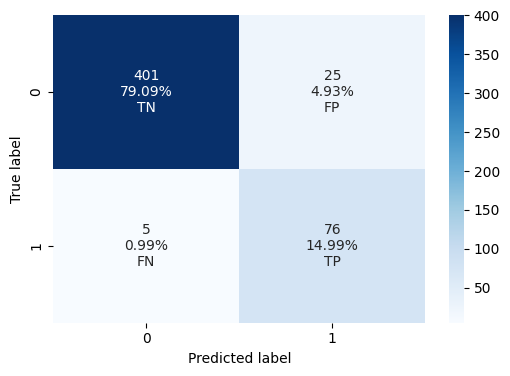

In [ ]:
# display the confusion matrix
confusion_matrix_sklearn(tuned_xgb2, X_test, y_test)

* The TEST results appear to have worked as expected. We've done a very good job of limiting false negatives but we've also generated a number of False Positives with this model.

###Feature Importances

Number of features: 29


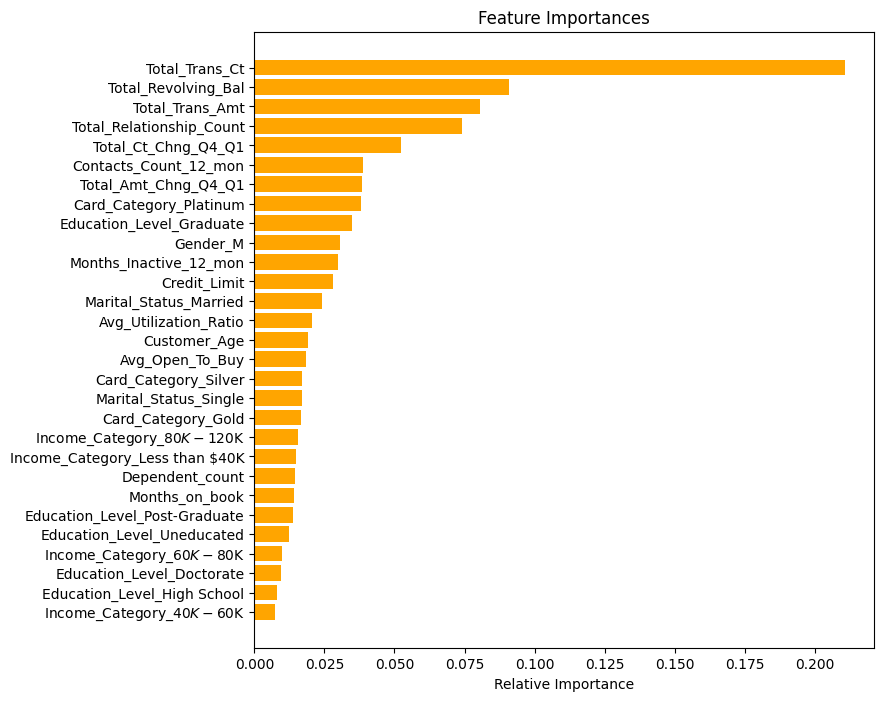

In [ ]:
# getting feature importances
feature_names = X_train.columns
importances = tuned_xgb2.feature_importances_
indices = np.argsort(importances)

# Printing the number of features
print(f"Number of features: {len(importances)}")

# Plotting the feature importances
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
# View the overall decision parameters for the selected model
# Configure the size
rcParams['figure.figsize'] = 100, 200
rcParams['figure.dpi'] = 300

# Plot the tree
plt.figure(figsize=(100, 100))
xgb.plot_tree(tuned_xgb2, num_trees=0)
plt.draw()  # Explicit draw call if needed
plt.show()  # Should show a larger plot in the interactive window

<Figure size 30000x30000 with 0 Axes>

## Business Insights and Conclusions

Though the model considers each of the 29 features in the decisioning process, the **5 most important** features considered by the model are:
1. `Total_trans_Ct` (Total transactions in the last 12 months): This feature indicates the customer's transaction activity, which strongly influences their churn probability.
  * The business will need to look at ways to increase transactions within their services. This could be done via a *loyalty program*.
2. `Total_Revolving_Bal` ($$ Balance carrying into the next month(s)): High revolving balances may signify financial strain and increase the likelihood of churn.
  * Banks enjoy the benefit of high revolving balances as the compound interest generates revenue. Would need to understand if this client's interest rates are competitive with other banks.
3. `Total_Trans_Amt` ($ Amount Spent): Customer spending behavior, reflected in this feature, plays a significant role in churn prediction.
  * A loyalty program could increase transcation amounts as customers become assured that every dollar they spend is rewarded.
4. `Total_Relationship_Count` (# of products held by customer): The number of products a customer uses can indicate their loyalty and commitment to the bank.
  * Also, the higher the number of products the customer has, the more difficult and time consuming to transition them to another service provider.
  * This machine learning model might benefot from looking at what types of products are included.
5. `Total_Ct_Change_Q4_Q1` (% change in total transactions): Changes in transaction behavior between quarters can signal potential churn risk.
  * The bank should consider proactive measures for engaging with clients after decreased purchasing periods. One way to accomplish this would be to offer a discount or promotion for services that encourage (or require) in additional transactions.

* The XG Boost model that was selected has proven effective at predicting customer accounts that are expected to churn.
  * The drawback from this model is that it sacrifices the precision score. This means that the buiness will need to be prepared to spend resources on False Positives (customer accounts who were predicted to churn but are actually not at-risk)


***


## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>


- EDA is an important part of any project involving data.
- It is important to investigate and understand the df better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histbox(df, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df: dfframe
    feature: dfframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        df=df, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        df=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="red"
    ) if bins else sns.histplot(
        df=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="black", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# function to create labeled barplots
def labeled_barplot(df, feature, perc=False, n=None, rotation=90, order=None):
    """
    Barplot with percentage at the top

    df: dfframe
    feature: dfframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    rotation: degree of rotation for the x-axis labels (default is 90)
    order: specific order of categories on x-axis (None for value counts order, list for manual order)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()

    # Adjust figure size based on the number of categories
    if n is None:
        plt.figure(figsize=(count + 1, 4))
    else:
        plt.figure(figsize=(n + 1, 4))

    # Determine the order of the x-axis categories
    if order is not None and isinstance(order, list):
        category_order = order[:n]
    else:
        category_order = df[feature].value_counts().index[:n]

    # Create the countplot with the specified order
    ax = sns.countplot(
        df=df,
        x=feature,
        palette="Paired",
        order=category_order
    )

    plt.xticks(rotation=rotation, fontsize=15)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [ ]:
def stacked_barplot(df, predictor, target, order=None, ascending=False):
    """
    Print the category counts and plot a stacked bar chart

    df: dfframe
    predictor: independent variable
    target: target variable
    order: List specifying the order of categories on the x-axis. If None, sorting is based on the counts of the target.
    ascending: Boolean, whether the sorting should be ascending. Default is False.
    """
    if order is None:  # If no custom order is provided, sort by the value counts of the target
        sorter = df[target].value_counts().index[-1]
        tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
            by=sorter, ascending=ascending
        )
        tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
            by=sorter, ascending=ascending
        )
    else:  # If custom order is provided, use it directly and ignore the ascending argument
        tab1 = pd.crosstab(df[predictor], df[target], margins=True).reindex(order)
        tab = pd.crosstab(df[predictor], df[target], normalize="index").reindex(order)

    print(tab1.drop('All', axis=1))  # Exclude the 'All' margin for printing
    print("-" * 120)
    tab.plot(kind="bar", stacked=True, figsize=(len(tab.index), 5))  # Adjust the figure size accordingly
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        df=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        df=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(df=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        df=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Univariate Analysis

#####Customer_Age

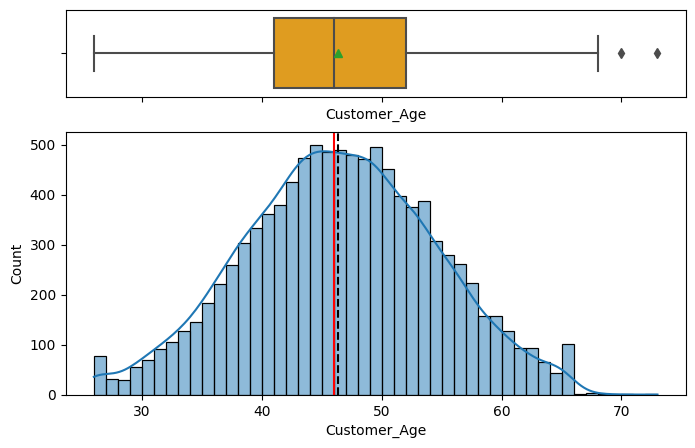

In [ ]:
histbox(df, "Customer_Age", kde=True)

In [ ]:
spilltea('Customer_Age')

The maximum value is: 73 
The minimum value is: 26 
The average value is: 46.3260 
The most common value is: 44 


#####Months on Book

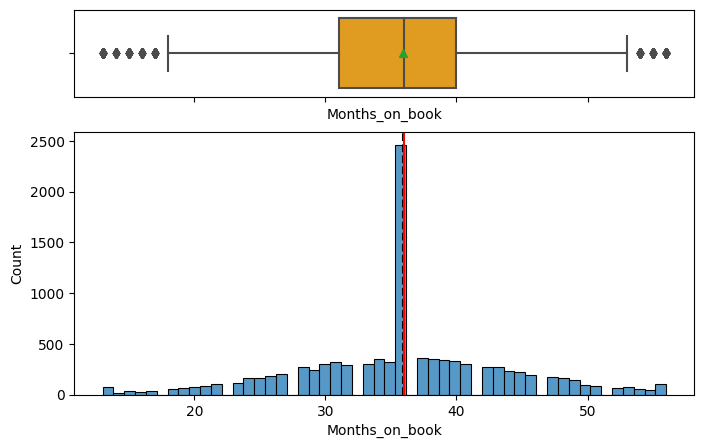

In [ ]:
histbox(df, 'Months_on_book')

In [ ]:
spilltea('Months_on_book')

# Calculate the mode of the column and get its count
mode_value = df['Months_on_book'].mode()[0]
mode_count = df['Months_on_book'].value_counts()[mode_value]

# Calculate the total count of the column
total_count = df['Months_on_book'].count()

# Divide the count of the mode by the total count
mode_proportion = mode_count / total_count

fmt('Customers who have been with the bank for exactly 36 months make up (% of df): ', mode_proportion, pct=True)




The maximum value is: 56 
The minimum value is: 13 
The average value is: 35.9284 
The most common value is: 36 
Customers who have been with the bank for exactly 36 months make up (% of data): 24.32% 


* It's strange that 24% of customer have been with the bank for 36 months and the other custoimers are dispersed across each of the other months (13 - 56)

#####Total Relationship Count

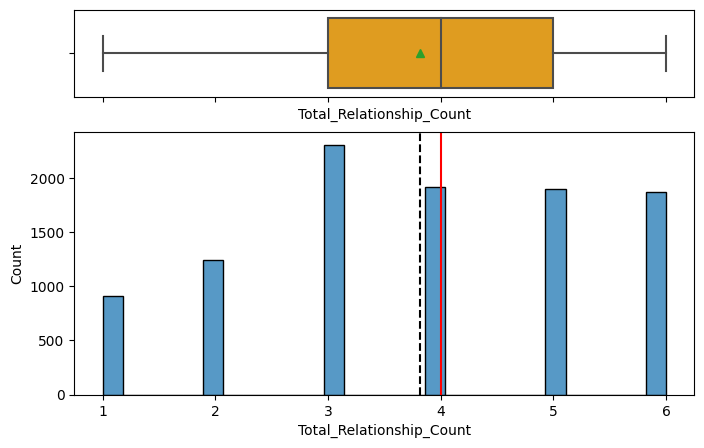

In [ ]:
histbox(df, 'Total_Relationship_Count')

In [ ]:
spilltea('Total_Relationship_Count')

The maximum value is: 6 
The minimum value is: 1 
The average value is: 3.8126 
The most common value is: 3 


* Right-skewed df

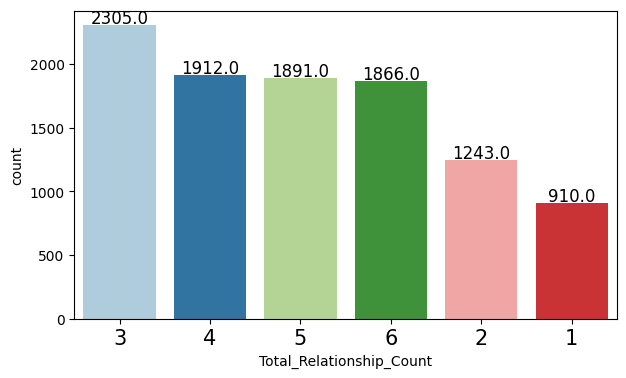

In [ ]:
labeled_barplot(df, 'Total_Relationship_Count', rotation=0, order='ascending')

#####Months_Inactive_12_mon

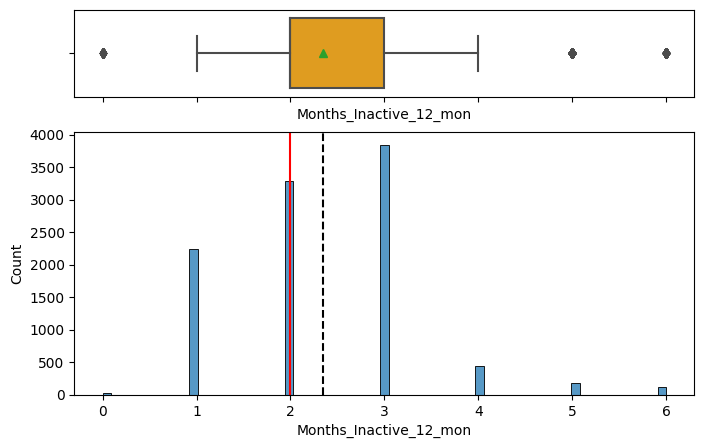

In [ ]:
histbox(df, 'Months_Inactive_12_mon')

In [ ]:
spilltea('Months_Inactive_12_mon')
inactive_count = df[df['Months_Inactive_12_mon'] == 0]['Months_Inactive_12_mon'].count()
fmt('# of accounts that have been active every month (in the past 12 months): ', inactive_count)


The maximum value is: 6 
The minimum value is: 0 
The average value is: 2.3412 
The most common value is: 3 
# of accounts that have been active every month (in the past 12 months): 29 


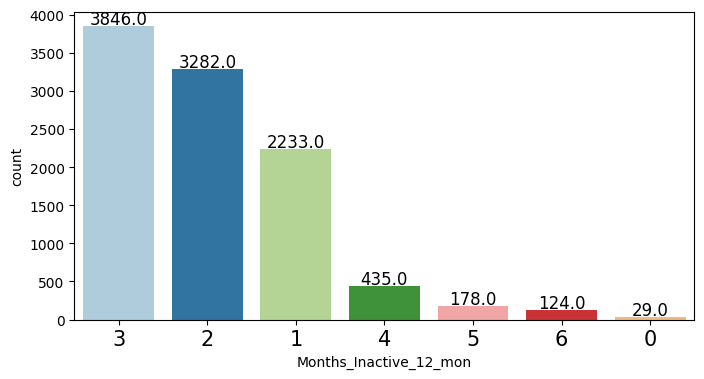

In [ ]:
labeled_barplot(df, 'Months_Inactive_12_mon', rotation=0, order='ascending')

* Generally 1-3 months on inactive list with much fewer customers inactive for longer
* There are only a handful of customers who have not been inactive over the past twelve months. This does not seem like an apprpriate number

#####Contacts_Count_12_mon

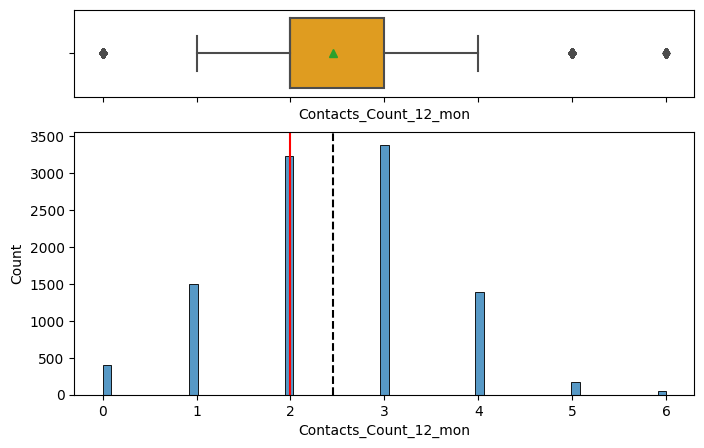

In [ ]:
histbox(df, 'Contacts_Count_12_mon')

In [ ]:
spilltea('Contacts_Count_12_mon')

The maximum value is: 6 
The minimum value is: 0 
The average value is: 2.4553 
The most common value is: 3 


* Normally distributed

#####Credit_Limit

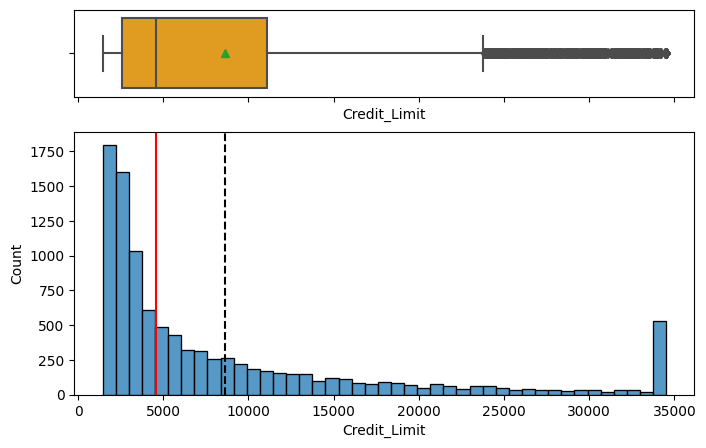

In [ ]:
histbox(df, 'Credit_Limit')

In [ ]:
spilltea('Credit_Limit')

The maximum value is: 34516.0000 
The minimum value is: 1438.3000 
The average value is: 8631.9537 
The most common value is: 34516.0000 


* Heavilty skewed to the right
* credit limits are negatively correlatied to counts until you reach the maximum credit limit value (which spikes)

#####Total_Revolving_Bal

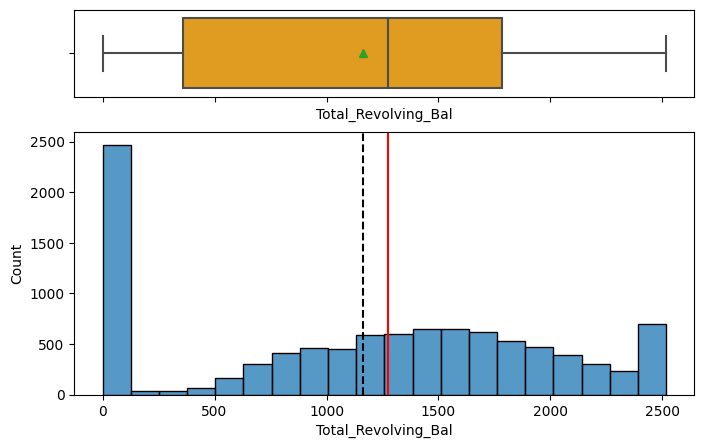

In [ ]:
histbox(df, 'Total_Revolving_Bal')

In [ ]:
spilltea('Total_Revolving_Bal')

The maximum value is: 2,517 
The minimum value is: 0 
The average value is: 1162.8141 
The most common value is: 0 


#####Avg_Open_To_Buy

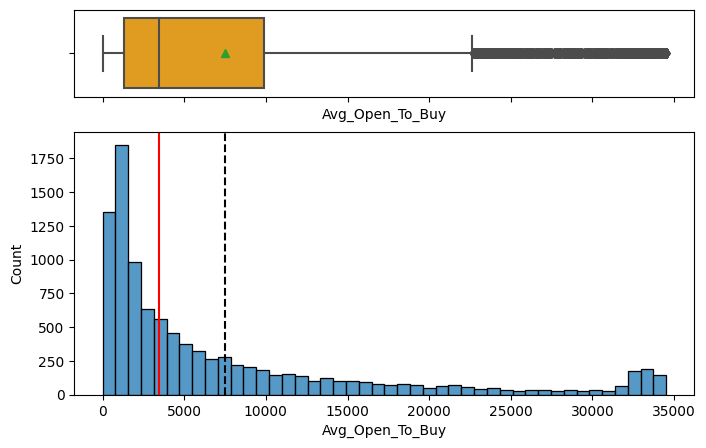

In [ ]:
histbox(df, 'Avg_Open_To_Buy')

In [ ]:
spilltea('Avg_Open_To_Buy')

The maximum value is: 34516.0000 
The minimum value is: 3.0000 
The average value is: 7469.1396 
The most common value is: 1438.3000 


* Heavily right-skewed

#####Total_Amt_Chng_Q4_Q1

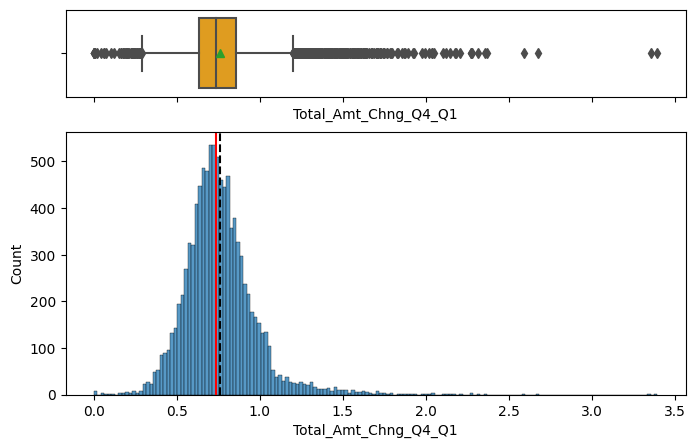

In [ ]:
histbox(df, 'Total_Amt_Chng_Q4_Q1')

In [ ]:
spilltea('Total_Amt_Chng_Q4_Q1')

The maximum value is: 3.3970 
The minimum value is: 0.0000 
The average value is: 0.7599 
The most common value is: 0.7910 


* this would be normally distributed if not for the dozens of outliers.

#####Total_Trans_Amt

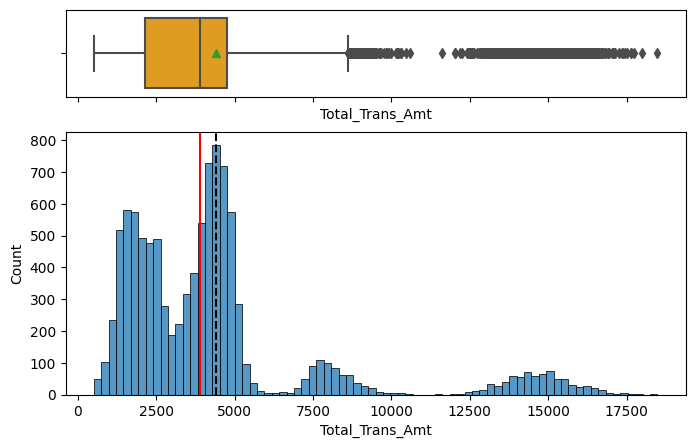

In [ ]:
histbox(df, 'Total_Trans_Amt')

In [ ]:
spilltea('Total_Trans_Amt')

The maximum value is: 18,484 
The minimum value is: 510 
The average value is: 4404.0863 
The most common value is: 4,253 


* Right-skewed df with possible clusters

#####Total_Trans_Ct             

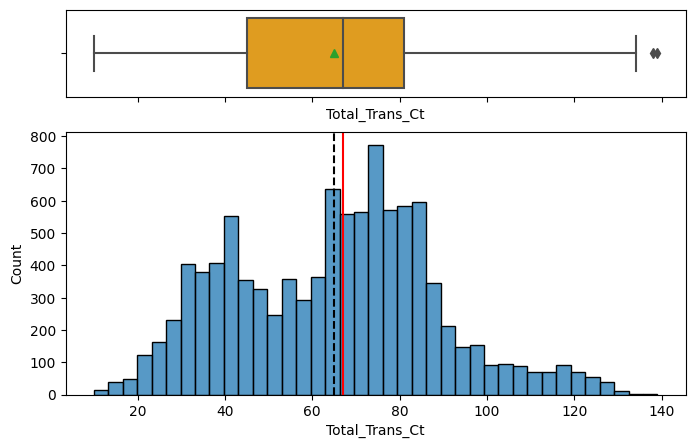

In [ ]:
histbox(df, 'Total_Trans_Ct')

In [ ]:
spilltea('Total_Trans_Ct')

The maximum value is: 139 
The minimum value is: 10 
The average value is: 64.8587 
The most common value is: 81 


* I don't think a minimum of 10 transactions in the past 12 months is possible if there are also 29 customers who have never been inactive in the same timeframe.
* This is left-skewed df

#####Total_Ct_Chng_Q4_Q1

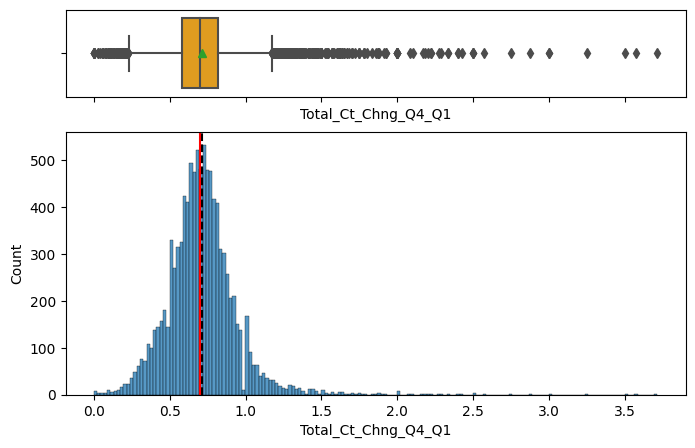

In [ ]:
histbox(df, 'Total_Ct_Chng_Q4_Q1')

In [ ]:
spilltea('Total_Ct_Chng_Q4_Q1')

The maximum value is: 3.7140 
The minimum value is: 0.0000 
The average value is: 0.7122 
The most common value is: 0.6670 


* Normally distributed if not for dozens of outliers

#####Avg_Utilization_Ratio

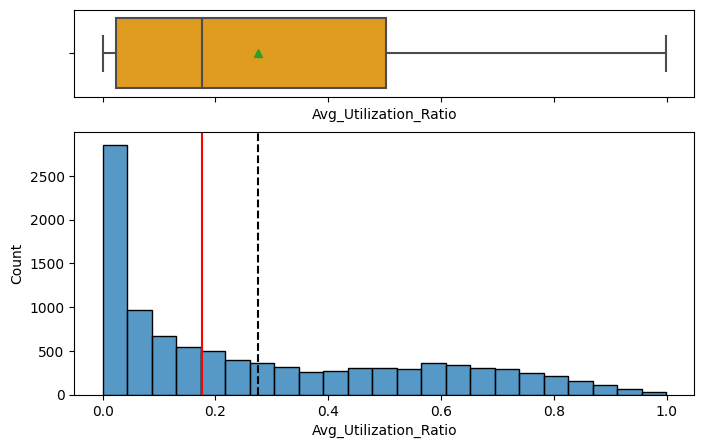

In [ ]:
histbox(df, 'Avg_Utilization_Ratio')

In [ ]:
spilltea('Avg_Utilization_Ratio')

The maximum value is: 0.9990 
The minimum value is: 0.0000 
The average value is: 0.2749 
The most common value is: 0.0000 


* Right-skewed df

#####Dependent_Count

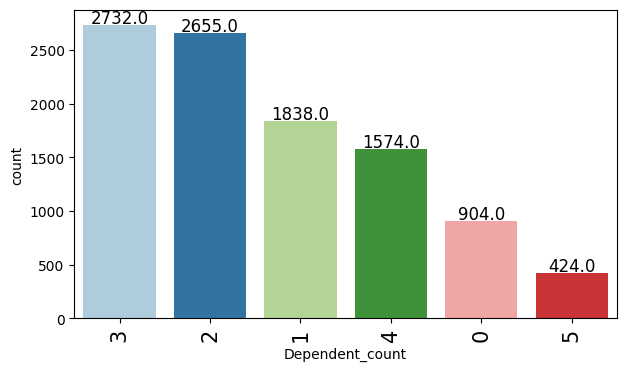

In [ ]:
labeled_barplot(df, "Dependent_count")

#####Gender

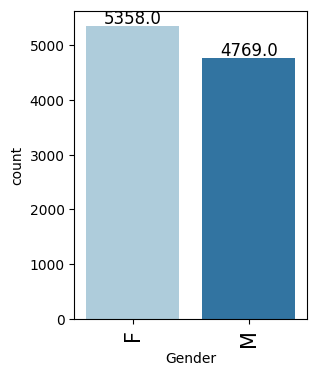

In [ ]:
labeled_barplot(df, 'Gender')

#####Education_Level

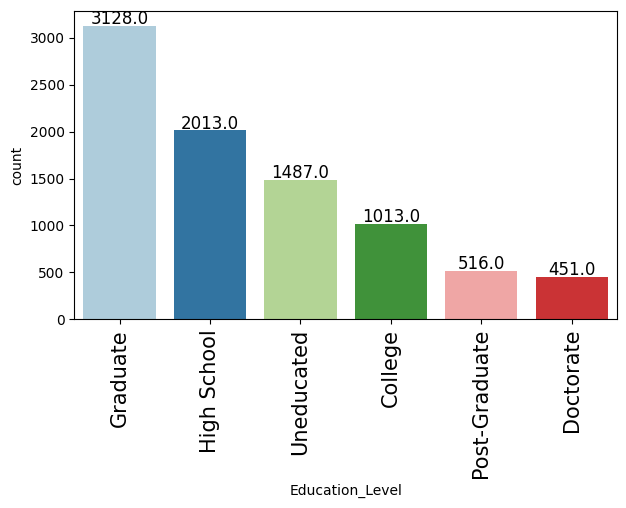

In [ ]:
labeled_barplot(df, 'Education_Level')

#####Marital_Status

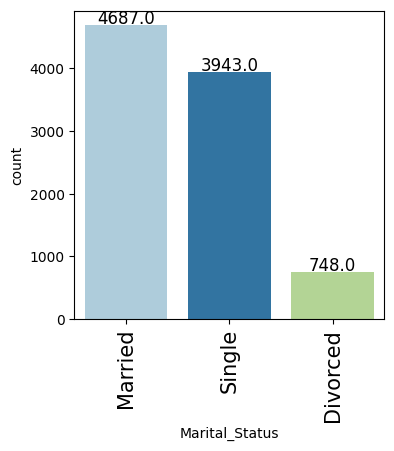

In [ ]:
labeled_barplot(df, 'Marital_Status')

#####Income_Category

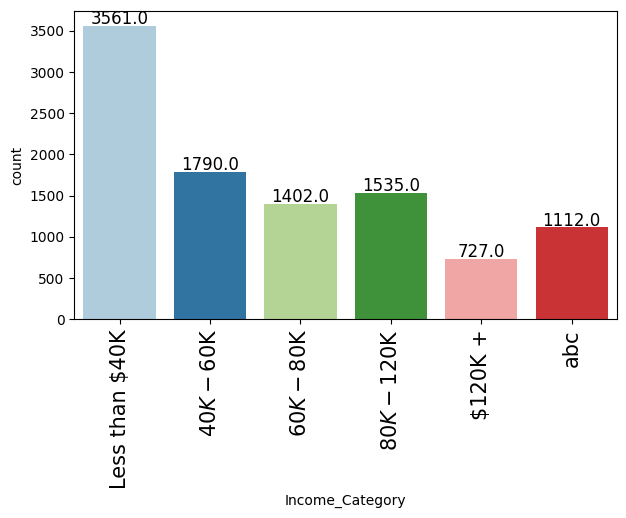

In [ ]:
order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'abc']
labeled_barplot(df, 'Income_Category', order=order)

#####Card_Category

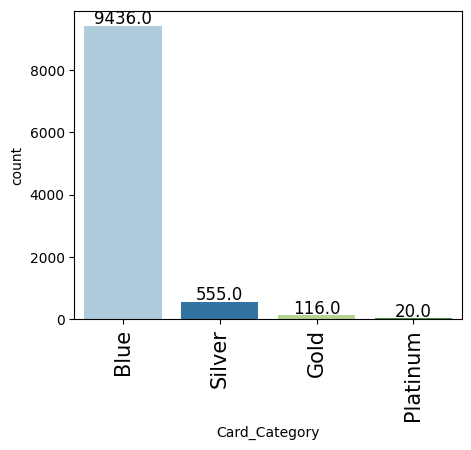

In [ ]:
labeled_barplot(df, 'Card_Category')

#####Attrition_Flag

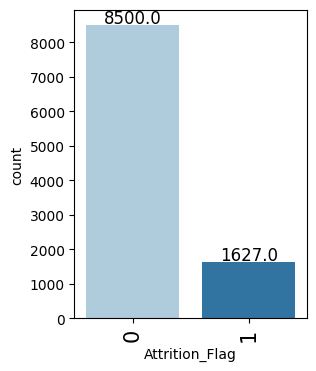

In [ ]:
labeled_barplot(df, 'Attrition_Flag')

In [ ]:
zero_count = len(df[df['Attrition_Flag'] == 0])
one_count = len(df[df['Attrition_Flag'] == 1])
total_count = df['Attrition_Flag'].value_counts().sum()
fmt(one_count/total_count, ' of customers have cancelled their service', pct=True)

16.07% of customers have cancelled their service 


####Bivariate Analysis

#####Gender

Attrition_Flag     0     1
Gender                    
All             8500  1627
F               4428   930
M               4072   697
------------------------------------------------------------------------------------------------------------------------


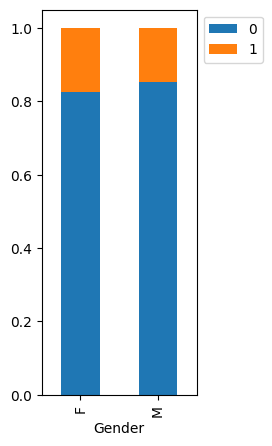

In [ ]:
stacked_barplot(df, "Gender", "Attrition_Flag")

#####Marital_Status

Attrition_Flag     0     1
Marital_Status            
All             7880  1498
Married         3978   709
Single          3275   668
Divorced         627   121
------------------------------------------------------------------------------------------------------------------------


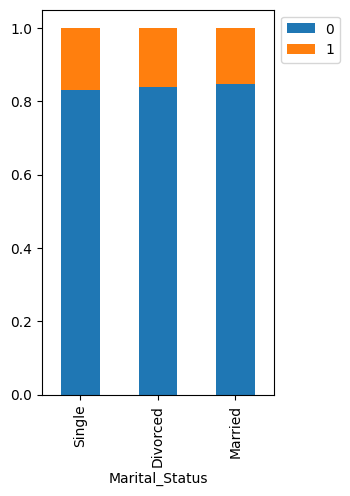

In [ ]:
stacked_barplot(df, "Marital_Status", 'Attrition_Flag')

#####Educaton_Level

Attrition_Flag      0    1
Education_Level           
Uneducated       1250  237
High School      1707  306
College           859  154
Graduate         2641  487
Post-Graduate     424   92
Doctorate         356   95
------------------------------------------------------------------------------------------------------------------------


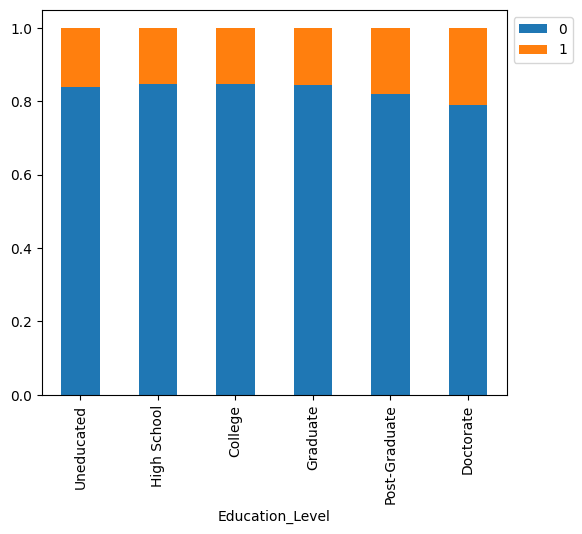

In [ ]:
order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
stacked_barplot(df, "Education_Level", "Attrition_Flag", order=order)

#####Income Category

Attrition_Flag      0    1
Income_Category           
Less than $40K   2949  612
$40K - $60K      1519  271
$60K - $80K      1213  189
$80K - $120K     1293  242
$120K +           601  126
abc               925  187
------------------------------------------------------------------------------------------------------------------------


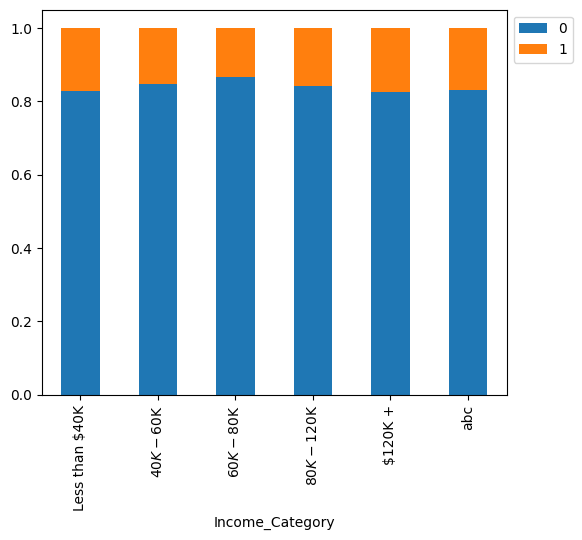

In [ ]:
order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'abc']
stacked_barplot(df, "Income_Category", "Attrition_Flag", order=order)

#####Contacts_Count_12_mon

Attrition_Flag            0     1
Contacts_Count_12_mon            
All                    8500  1627
3                      2699   681
2                      2824   403
4                      1077   315
1                      1391   108
5                       117    59
6                         0    54
0                       392     7
------------------------------------------------------------------------------------------------------------------------


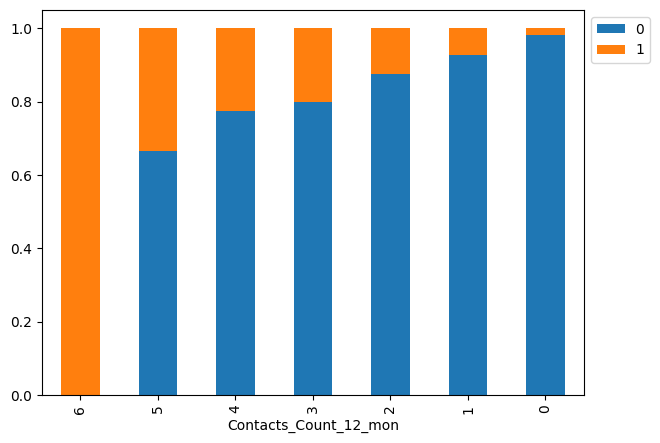

In [ ]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

* There's definately a corelation between the number of contacts and the attrition rate

#####Months_Inactive_12_mon

Attrition_Flag             0    1
Months_Inactive_12_mon           
0                         14   15
1                       2133  100
2                       2777  505
3                       3020  826
4                        305  130
5                        146   32
6                        105   19
------------------------------------------------------------------------------------------------------------------------


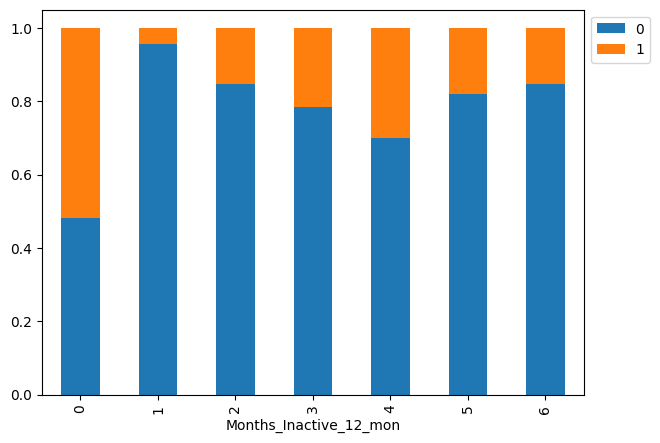

In [ ]:
order=[0,1,2,3,4,5,6]
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag", order=order)

#####Total_Relationship_Count

Attrition_Flag               0    1
Total_Relationship_Count           
1                          677  233
2                          897  346
3                         1905  400
4                         1687  225
5                         1664  227
------------------------------------------------------------------------------------------------------------------------


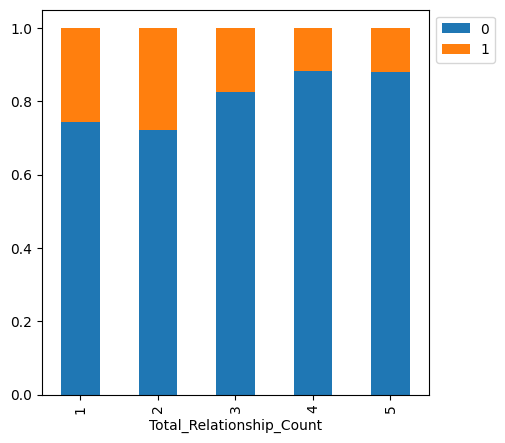

In [ ]:
order=[1,2,3,4,5]
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag", order=order)

#####Dependent_Count

Attrition_Flag      0    1
Dependent_count           
0                 769  135
1                1569  269
2                2238  417
3                2250  482
4                1314  260
5                 360   64
------------------------------------------------------------------------------------------------------------------------


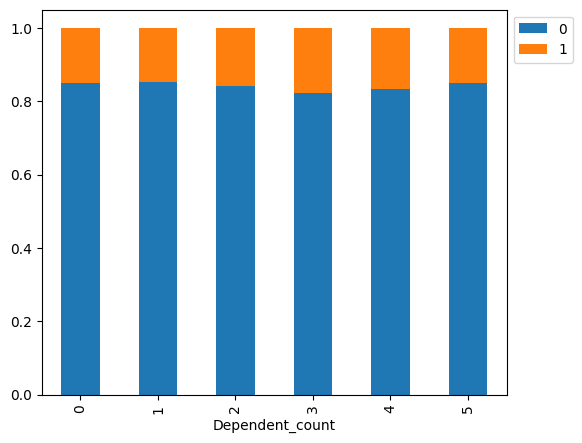

In [ ]:
order=[0,1,2,3,4,5]
stacked_barplot(df, "Dependent_count", "Attrition_Flag", order=order)

#####Total_Revolving_Balance

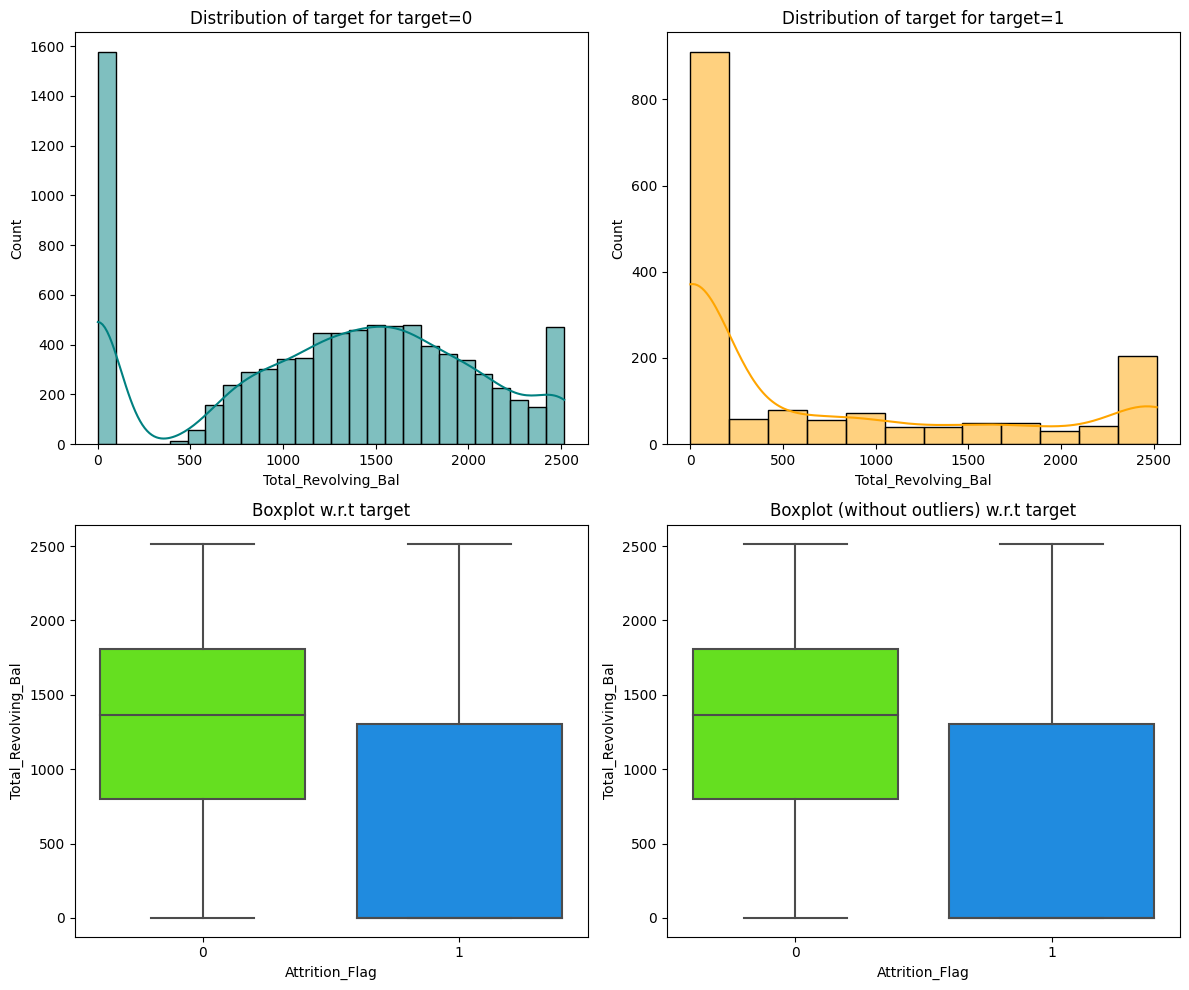

In [ ]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

#####Credit_Limit

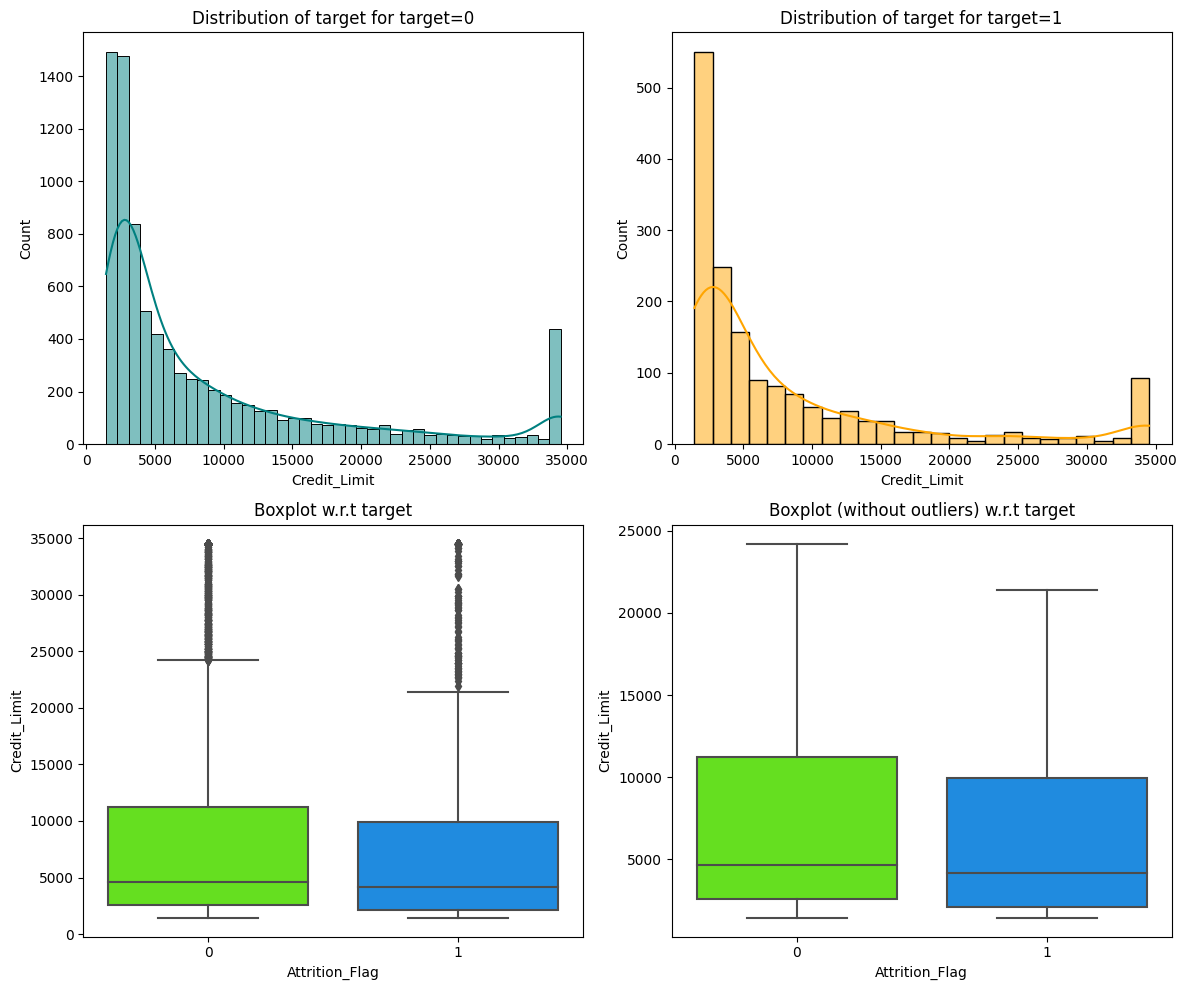

In [ ]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

#####Customer_Age

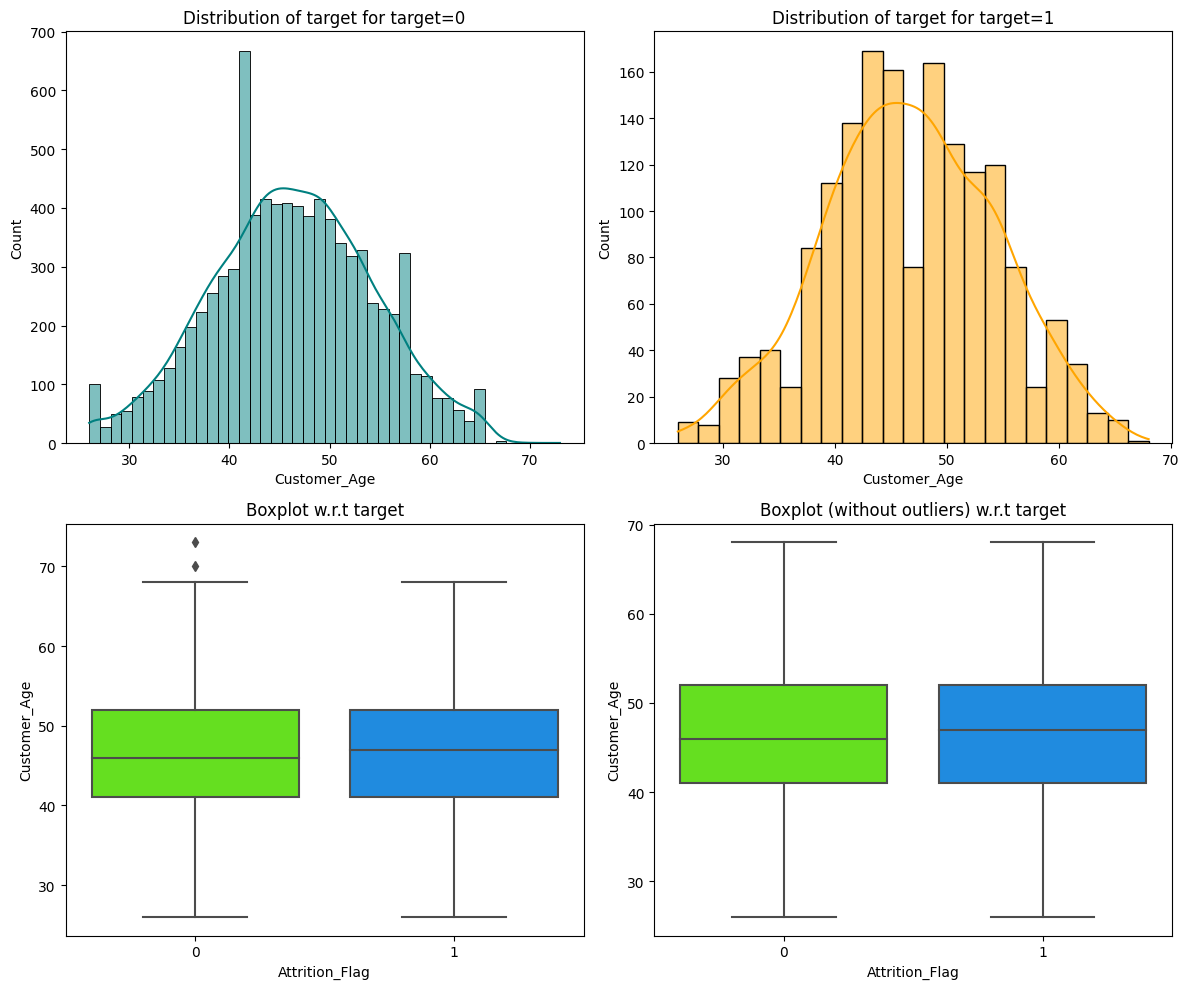

In [ ]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

#####Total_Trans_Ct

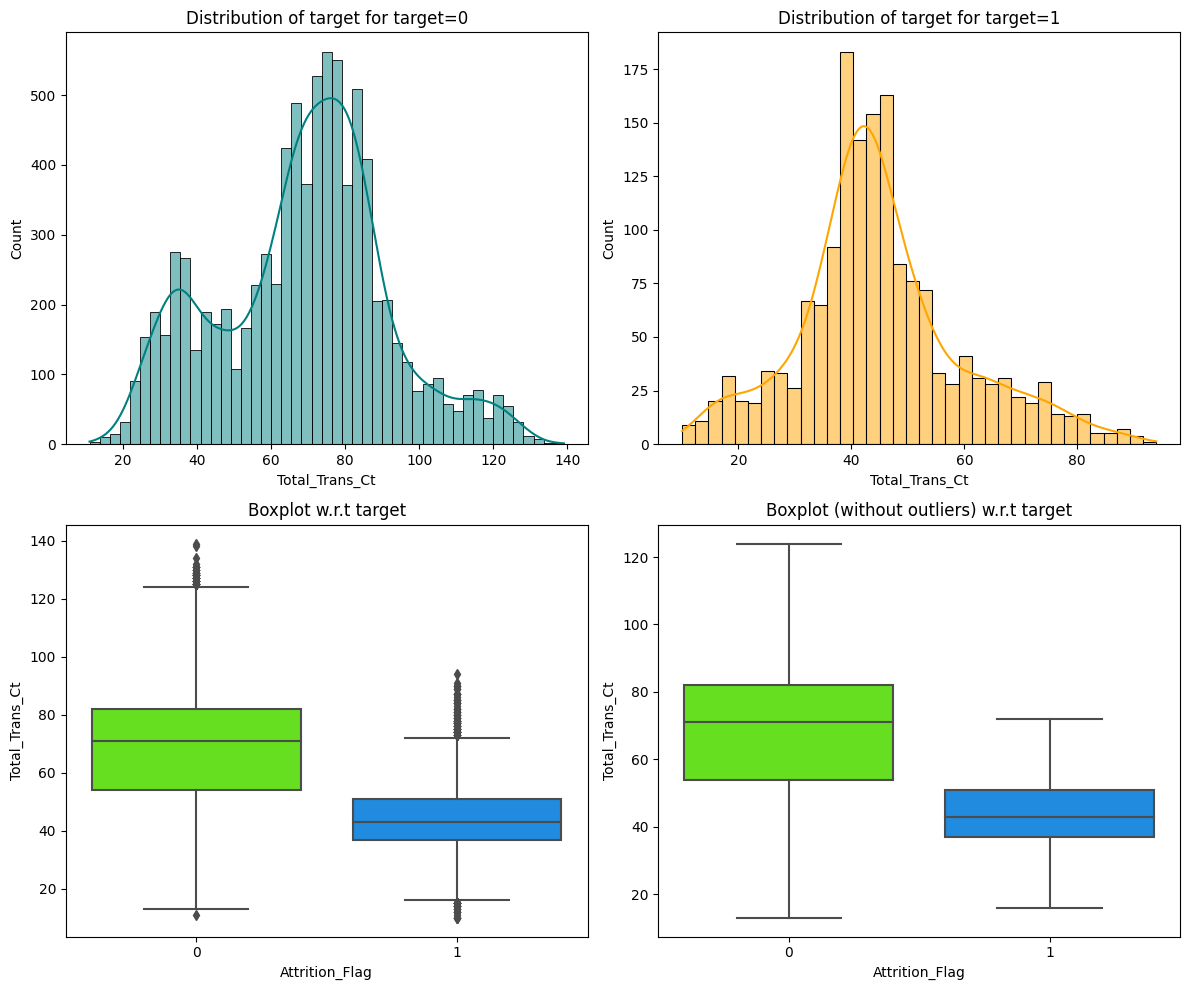

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

#####Total_Trans_Amt

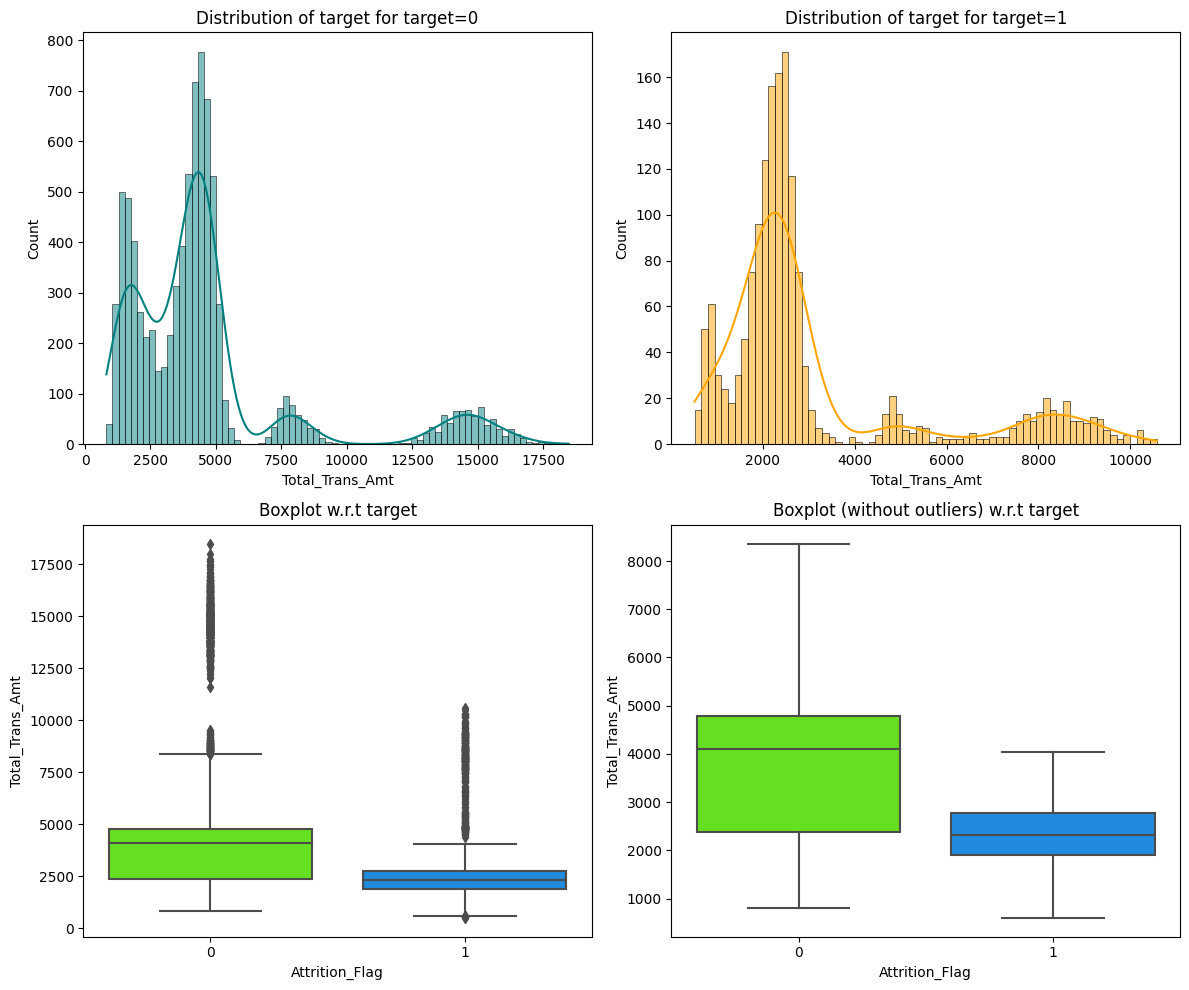

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

#####Total_Ct_Chng_Q4_Q1

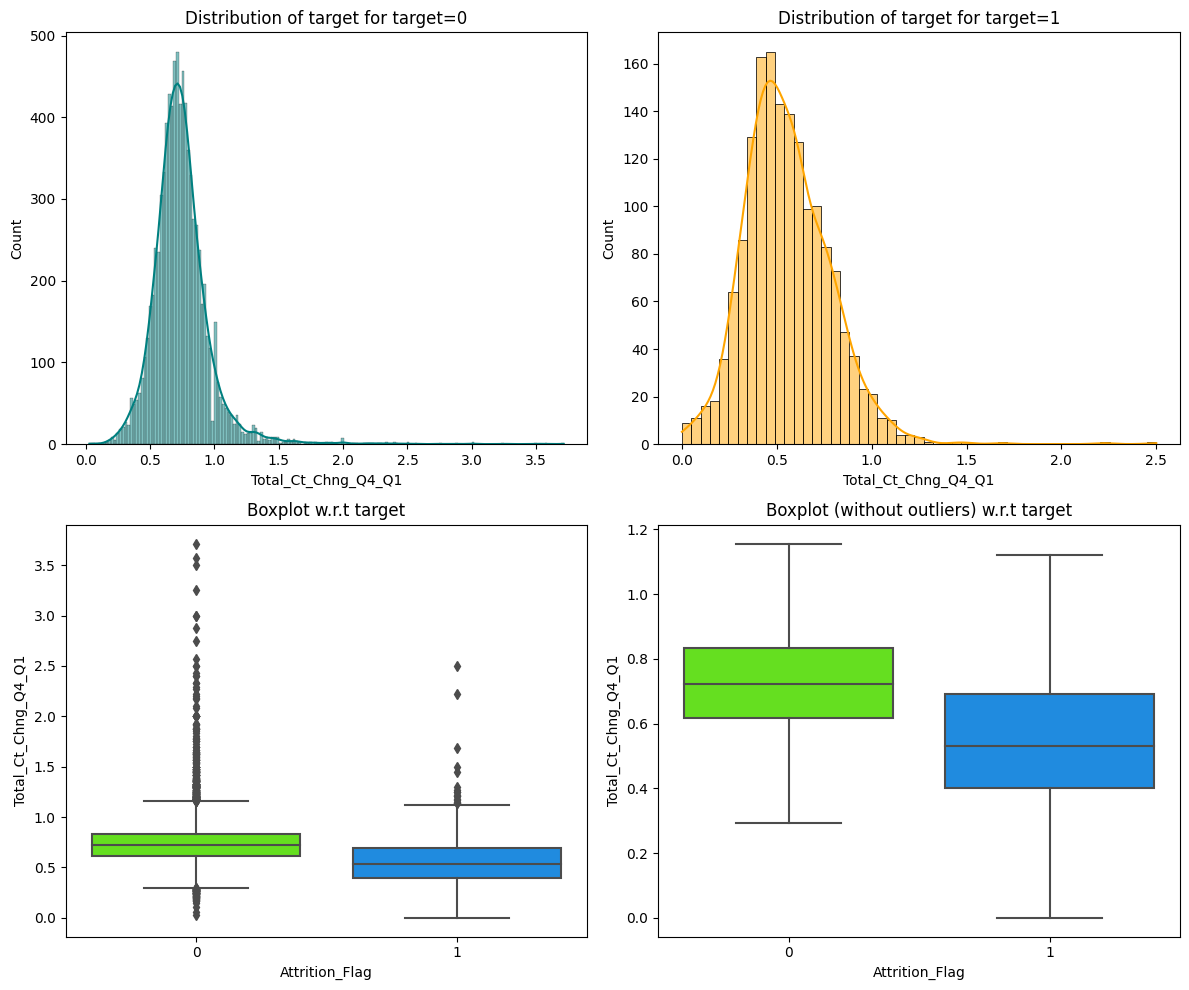

In [ ]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

#####Avg_Utilization_Ratio

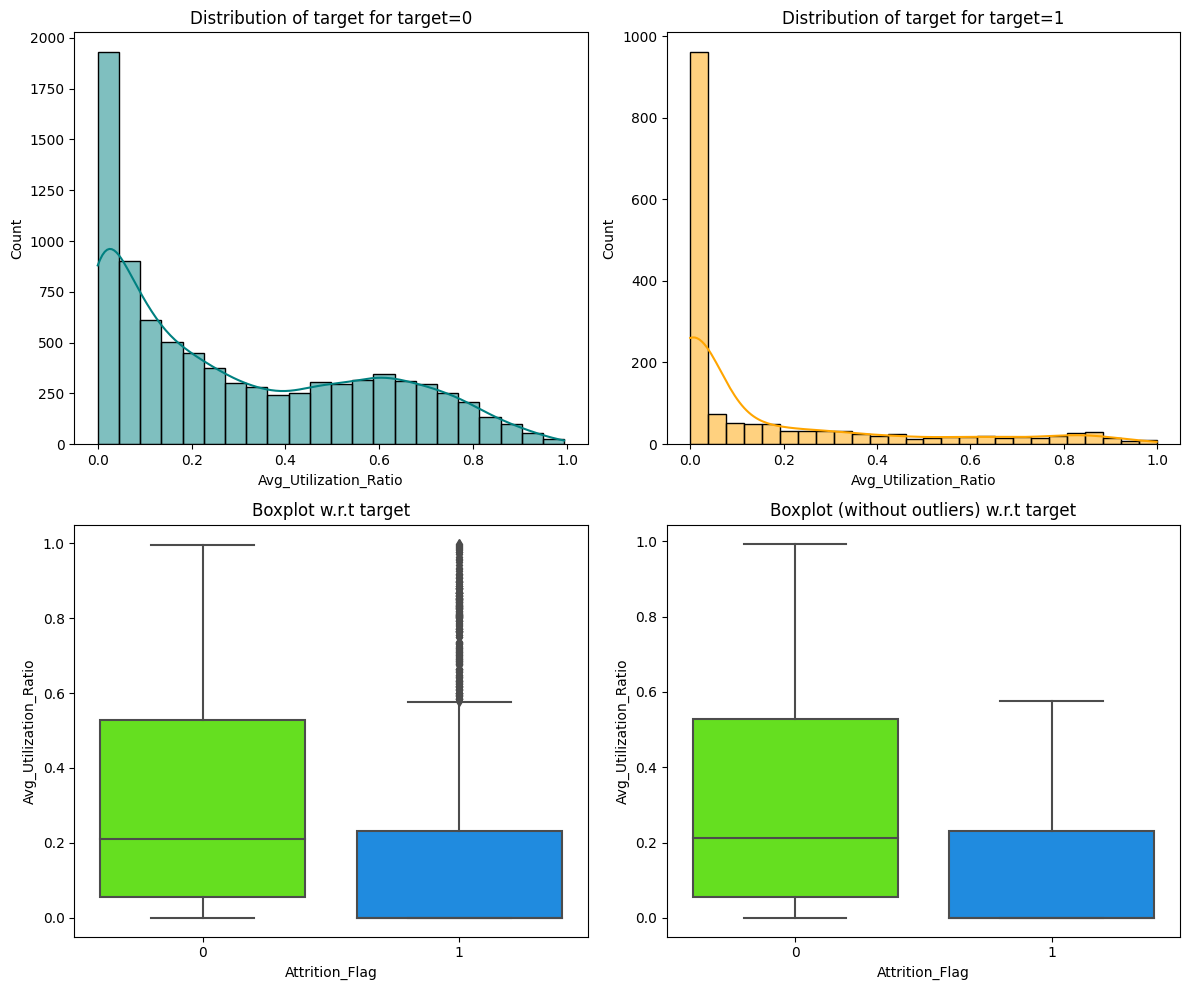

In [ ]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

#####Months_on_book

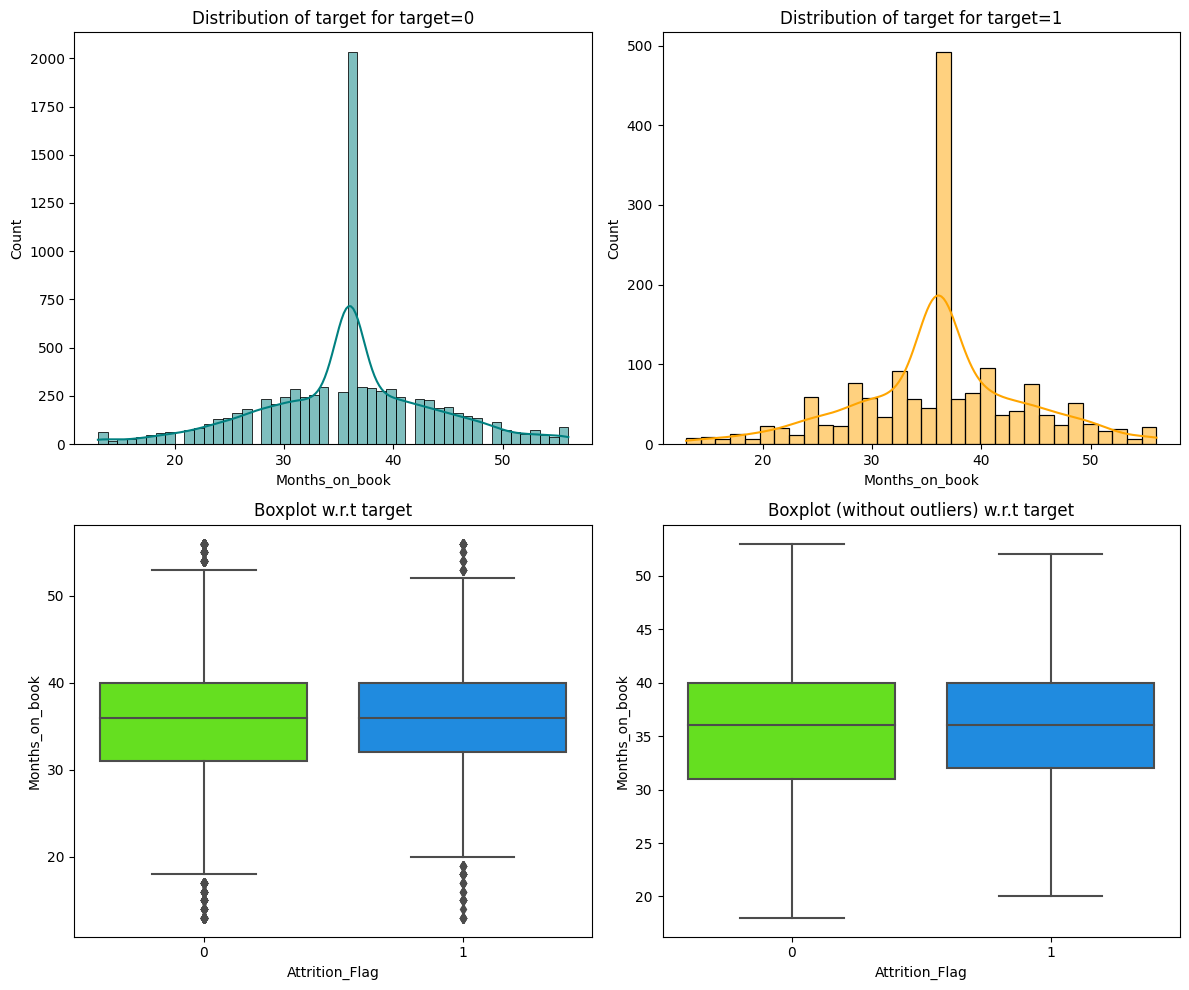

In [ ]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

#####Avg_Open_To_Buy

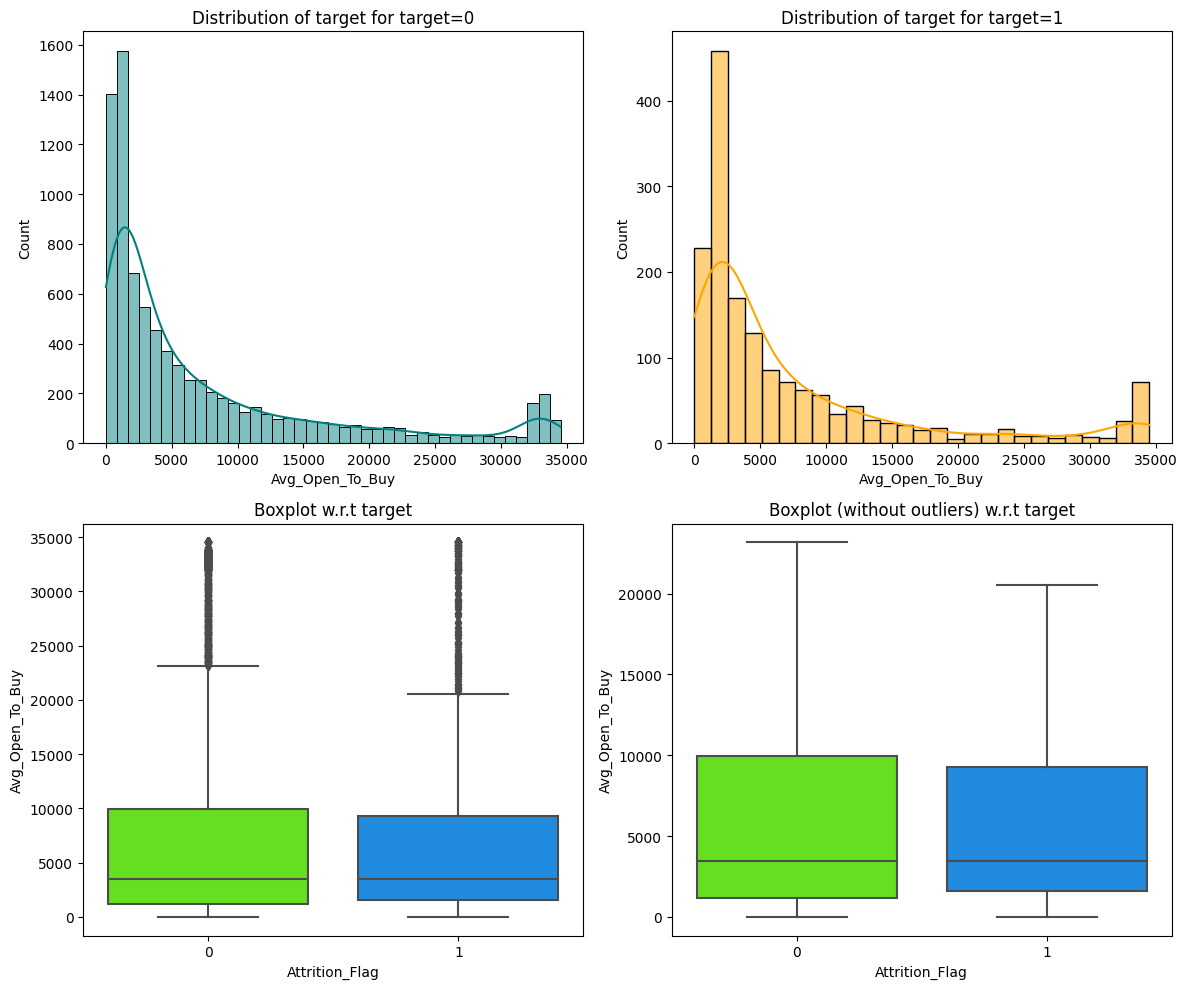

In [ ]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")